### 0. 패키지 및 데이터 불러오기 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import math

warnings.filterwarnings(action='ignore')

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 한글 설정
from matplotlib import rc

rc('font', family='Arial Unicode Ms')

pd.set_option('display.max_columns', None)

In [5]:
# 주의 : 파이차트 시각화를 위해 패키지 설치 (원할한 시각화를 나타내기 위해 0.5.8 버전으로 설치해야함)
# pip install pyecharts==0.5.8 

In [6]:
# 데이터 불러오기 
car_t = pd.read_csv('./train_data_r.csv') # 엔진, 파워 ,시트의 결측값을 직접 채운 파일 
car_tr = pd.read_csv('./train_data_n.csv') # cr단위 변환 # 직접 채우지 않은 파일

### 1. 데이터 전처리 

In [7]:
# 데이터 확인 
car_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [8]:
# car_tr 데이터 결측치 확인 
import missingno
missingno.matrix(car_tr)

ModuleNotFoundError: No module named 'missingno'

- car_tr(원본데이터)의 데이터를 살펴보면 Engine, Power, Seats에 결측치가 존재 함.

In [9]:
# 데이터 확인 
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             6019 non-null   object 
 10  Power              6019 non-null   object 
 11  Seats              6019 non-null   int64  
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(1), int64(4), object(9)
memory usage: 658.5+ KB


In [10]:
# 결측치 확인 (car_t)
car_t.isna().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

- car_t(결측치를 채운 데이터)데이터를 보면 수기로 채워 Engine, Power, Seats의 결측치를 채움

In [11]:
# New_price에서 결측치를 0 Lakh로 채워 넣기
car_t['New_Price'] = car_t['New_Price'].fillna('0 Lakh')

In [12]:
# Mileage null값 확인 (총 2개의 null 값이 확인 되었음. 확인결과 전기차)
car_t[car_t['Mileage'].isnull()]

Unnamed: 0                       Name Location  Year  Kilometers_Driven  \
4446        4446       Mahindra E Verito D4  Chennai  2016              50000   
4904        4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000   

     Fuel_Type Transmission Owner_Type Mileage   Engine   Power  Seats  \
4446  Electric    Automatic      First     NaN    72 CC  41 bhp      5   
4904  Electric    Automatic      First     NaN  1798 CC  73 bhp      5   

       New_Price  Price  
4446  13.58 Lakh  13.00  
4904      0 Lakh  12.75

In [13]:
# Mileage null값 제거
car_t = car_t.drop([4446, 4904])
car_t.reset_index(drop=True, inplace=True)

In [17]:
# 필요없는 컬럼 'Unnamed: 0' 제거 
car_t.drop(['Unnamed: 0'], axis=1, inplace=True)

In [19]:
# 단위제거 함수
def get_split(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1[i].split(' ')[0])
        
    data[new] = ls2
    print(new)
    
def get_split2(data, column, new):

    ls1 = data[column]
    ls2 = []
    for i in range(0,len(data)):
        ls2.append(ls1.str.split(' ', n=1)[i][1])
        
    data[new] = ls2
    print(new)

In [20]:
# 단위제거 완료
get_split(car_t, 'Name', 'Brand')
get_split2(car_t, 'Name', 'Car_name')
get_split(car_t, 'Mileage', 'Mile')
get_split(car_t, 'Engine', 'Eng')
get_split(car_t, 'Power', 'Pow')
get_split(car_t, 'New_Price', 'New_p')

Brand
Car_name
Mile
Eng
Pow
New_p


In [22]:
# 형변환 (범주형 -> 수치형)
car_t[['Mile', 'Eng', 'Pow', 'New_p']] = car_t[['Mile', 'Eng', 'Pow', 'New_p']].astype(float)

In [25]:
# 중복된 브랜드 ISUZU를 Isuzu로 하나로 합치기 
car_t['Brand'][car_t['Brand'] == 'ISUZU'] = 'Isuzu'

In [26]:
# 확인 
car_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Location           6017 non-null   object 
 2   Year               6017 non-null   int64  
 3   Kilometers_Driven  6017 non-null   int64  
 4   Fuel_Type          6017 non-null   object 
 5   Transmission       6017 non-null   object 
 6   Owner_Type         6017 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             6017 non-null   object 
 9   Power              6017 non-null   object 
 10  Seats              6017 non-null   int64  
 11  New_Price          6017 non-null   object 
 12  Price              6017 non-null   float64
 13  Brand              6017 non-null   object 
 14  Car_name           6017 non-null   object 
 15  Mile               6017 non-null   float64
 16  Eng                6017 

<AxesSubplot:>

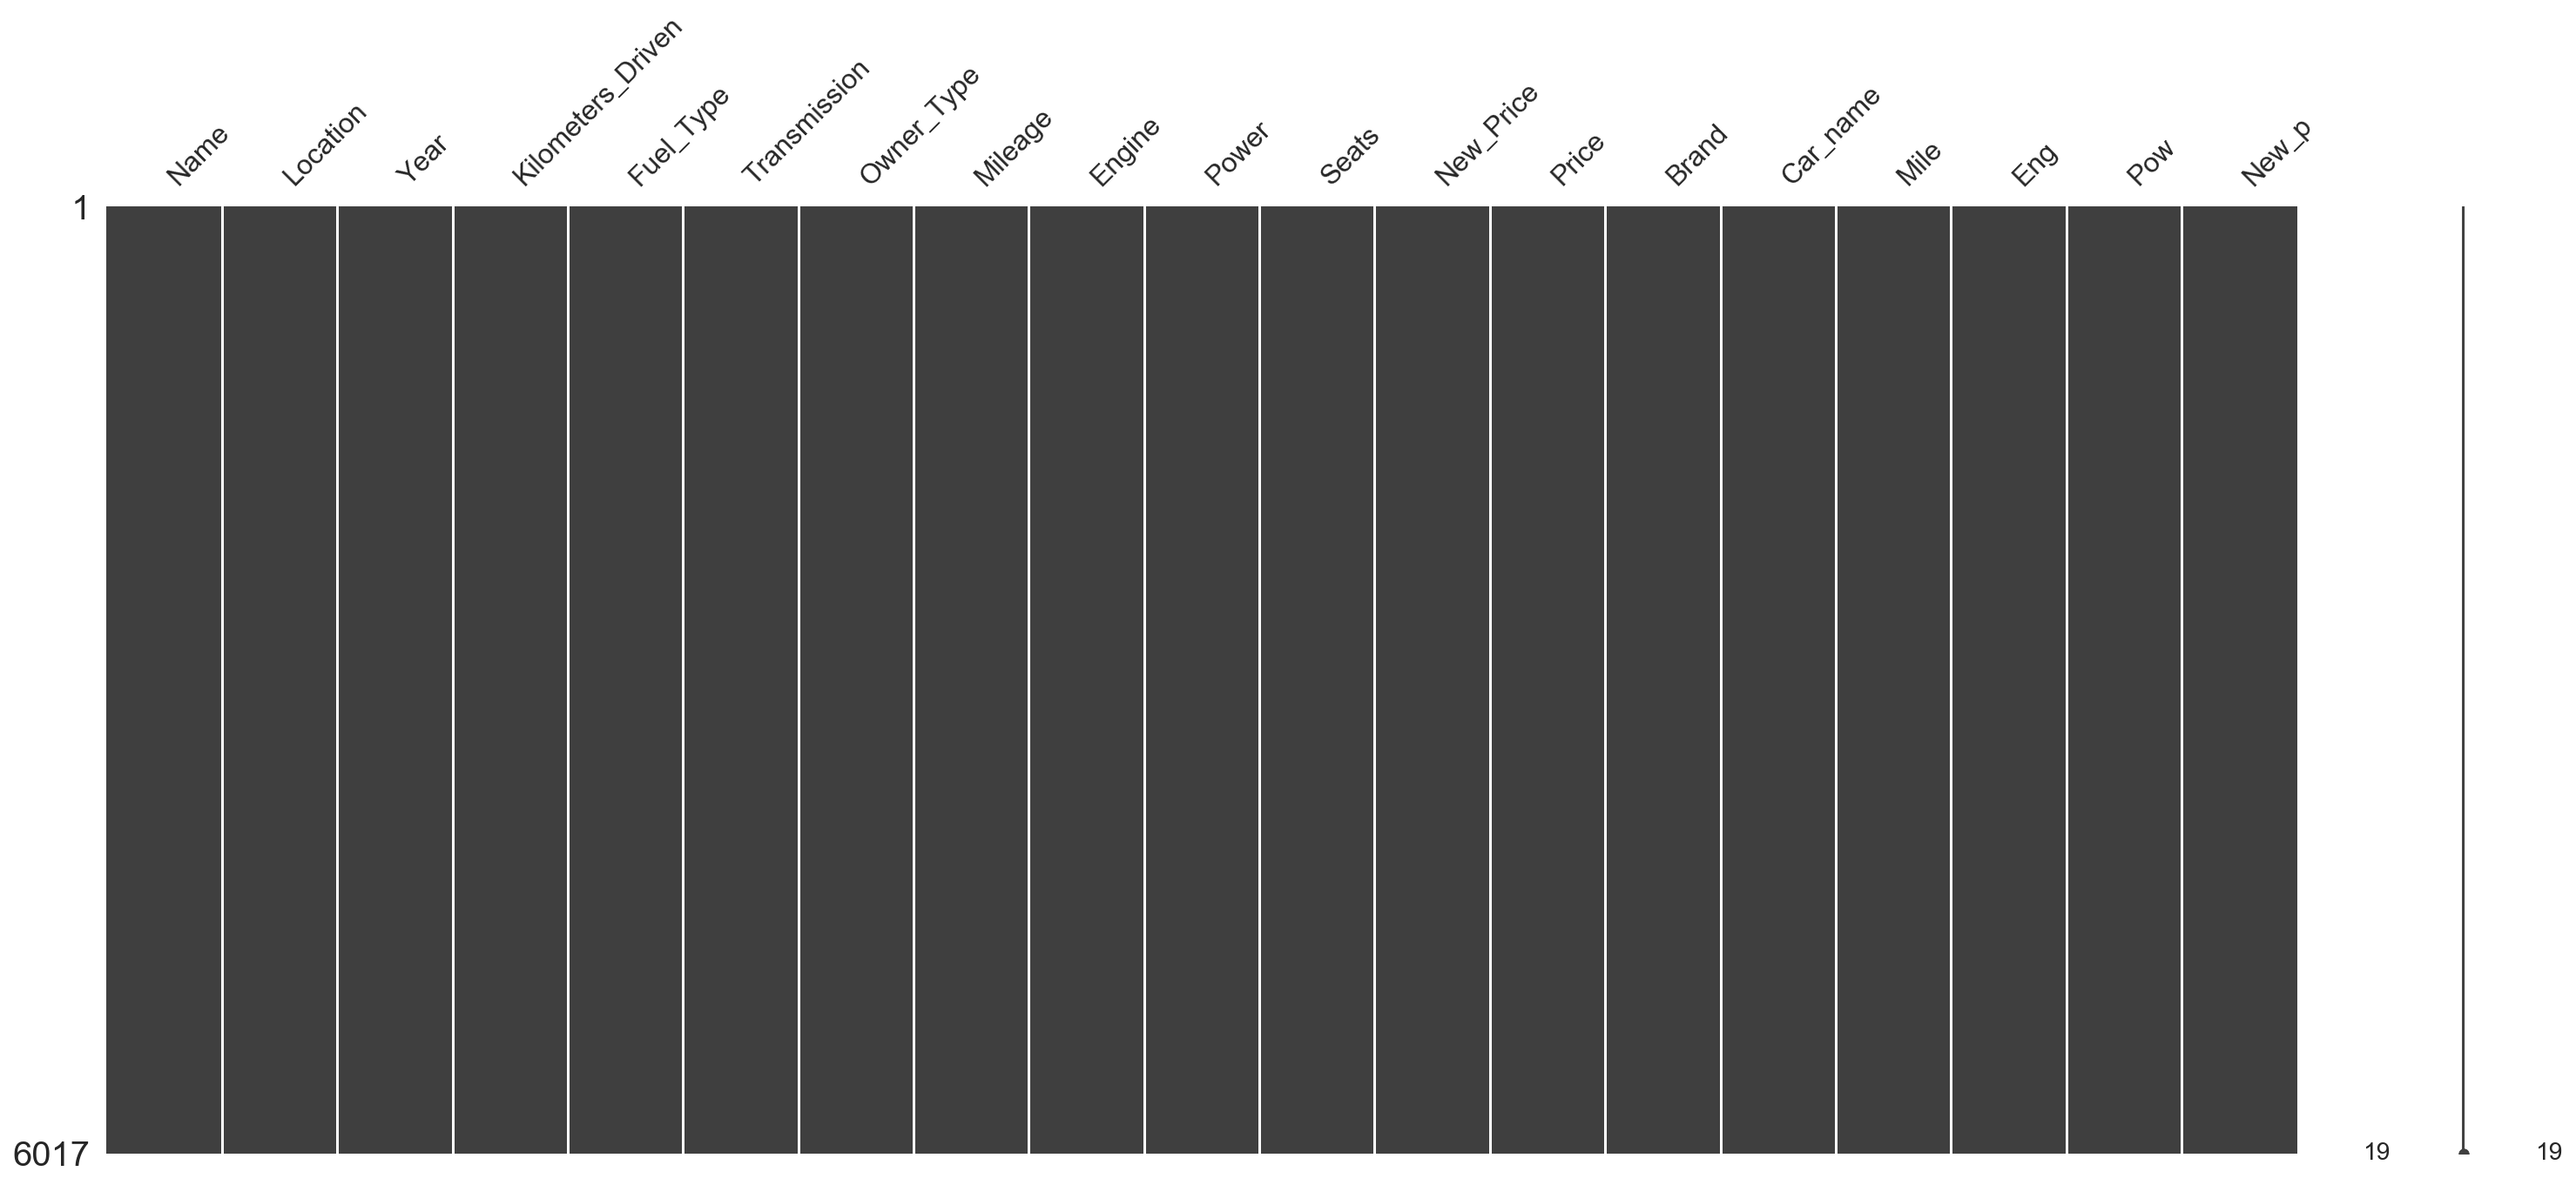

In [24]:
# car_t의 결측치 확인 
missingno.matrix(car_t)

### 2. EDA 

In [ ]:
# 브랜드별 등록 대수 확인 

In [31]:
# 브랜드 별 등록 대수 
brand = pd.DataFrame(car_t['Brand'].value_counts())
brand

Brand
Maruti          1211
Hyundai         1107
Honda            608
Toyota           410
Mercedes-Benz    318
Volkswagen       315
Ford             300
Mahindra         271
BMW              267
Audi             236
Tata             186
Skoda            173
Renault          145
Chevrolet        121
Nissan            91
Land              60
Jaguar            40
Fiat              28
Mitsubishi        27
Mini              26
Volvo             21
Porsche           18
Jeep              15
Datsun            13
Isuzu              3
Force              3
Lamborghini        1
Smart              1
Bentley            1
Ambassador         1

In [15]:
from pyecharts import Pie

ImportError: cannot import name 'Pie' from 'pyecharts' (/Users/kim-yeongjin/opt/anaconda3/envs/pap/lib/python3.7/site-packages/pyecharts/__init__.py)

In [57]:
from pyecharts import Pie

keys = list(brand["Brand"][:10].keys())
values = list(brand["Brand"][:10].values)

pie = Pie("Brand Top 10 ")
pie.add("", keys, values, is_randome=True, radius=[50, 90], rosetype='radius', is_legend_show=False,
       is_label_show=True)

pie

In [58]:
# 브랜드별 가격
brand = car_t.groupby(by=['Brand'], as_index=True).mean()

In [3]:
from pyecharts import Bar, Line, Overlap

key = list(brand['Price'].index)
value = list(brand['Price'].values.round())

bar = Bar()
bar.add("Mean Pricer", key, value)

bar.height = 600
bar.width = 1300

bar

ImportError: cannot import name 'Bar' from 'pyecharts' (/Users/kim-yeongjin/opt/anaconda3/envs/pap/lib/python3.7/site-packages/pyecharts/__init__.py)

- 브랜드별 가격 평균을 보니 람보르기니가 가장 높게 나온다. (참고로 람보르기니의 판매건은 1건이다)

In [62]:
# 연도별 분포표 (두 가지 중 마음에 드는 바차트 사용))
year = pd.DataFrame(car_t['Year'].value_counts()).sort_index() 

In [82]:
from pyecharts import Bar, Line, Overlap

key = list(year["Year"].keys())
value = list(year["Year"].values)

bar =Bar("Car count in Year", "1999년 ~ 2019년")
bar.add("count", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 600
bar.width = 1200

bar

In [104]:
from pyecharts import Bar

key = list(year["Year"].keys())
value = list(year["Year"].values)
value2 = list(year["Year"].values)
bar = Bar("Car count in Year", "1999 ~ 2019")
# the first add() legend to be transparent, ie 'rgba(0,0,0,0)', and set the is_stack flag is True
bar.add("Year", key, value, label_color=['rgba(0,0,0,0)'], is_stack=True)
bar.add("Count", key, value2, is_label_show=True, is_stack=True, label_pos='inside')

bar.height = 600
bar.width = 1200
bar.render()
bar

In [70]:
# 지역별 분포 
location = pd.DataFrame(car_t['Location'].value_counts())

In [71]:
keys = list(location["Location"].keys())
values = list(location["Location"].values)

pie = Pie("Location")
pie.add("", keys, values, is_randome=True, radius=[50, 90], rosetype='radius', is_legend_show=False,
       is_label_show=True)

pie

In [84]:
# 지역별 가격표
location = car_t.groupby(by=['Location'], as_index=True).mean()

In [86]:
key = list(location['Price'].index)
value = list(location['Price'].values.round())

bar =Bar("Used car price by region")
bar.add("Price", key, value, mark_line=["average"], mark_point=["max", "min"])

bar.height = 600
bar.width = 1200
bar

In [87]:
# 변속기 타입 (그래프 2가지 준비 2가지 중 택1)
tr = pd.DataFrame(car_t['Transmission'].value_counts())

In [88]:
keys = list(tr['Transmission'].keys())
values = list(tr['Transmission'].values)

pie = Pie("Transmission", title_pos='center')
pie.add("", keys, values, is_randome=True, radius=[50, 90], label_text_color=None, is_label_show=True,
        legend_orient='vertical', legend_pos='left')


pie

In [109]:
from pyecharts import Gauge

gauge = Gauge("Transmission")
gauge.add("", "Manual Ratio", 71.45, angle_range=[180, 0], scale_range=[0, 100], is_legend_show=False)
gauge.render()
gauge

In [137]:
gauge = Gauge("Transmission")
gauge.add("", "Auto Ratio", 28.55, angle_range=[180, 0], scale_range=[0, 100], is_legend_show=False)
gauge.render()
gauge

In [118]:
# 지역별 가격표
trp = car_t.groupby(by=['Transmission'], as_index=True).mean()

In [125]:
key = list(trp['Price'].index)
value = list(trp['Price'].values.round())

bar = Bar()
bar.add("Transsmmision Price", key, value)

bar.height = 500
bar.width = 800
bar

- 당연한 이야기지만 자동이 수동에 비해 가격이 높다.

In [135]:
owner = pd.DataFrame(car_t['Owner_Type'].value_counts())

In [136]:
keys = list(owner['Owner_Type'].keys())
values = list(owner['Owner_Type'].values)

pie = Pie("Owner_Type", title_pos='center')
pie.add("", keys, values, radius=[40, 80], label_text_color=None, is_label_show=True,
        legend_orient='vertical', legend_pos='left')

pie

In [140]:
# 오너 타입별 가격
owner = car_t.groupby(by=['Owner_Type'], as_index=True).mean()

In [144]:
key = list(owner['Price'].index)
value = list(owner['Price'].values.round())

bar = Bar()
bar.add("Price by Owner Type", key, value)

bar.height = 500
bar.width = 800
bar

- 대체적으로 첫번째 오너가 많다.

In [149]:
fuel = pd.DataFrame(car_t['Fuel_Type'].value_counts())

In [147]:
# 그래프 2개중 하나 택일 
keys = list(fuel["Fuel_Type"].keys())
values = list(fuel["Fuel_Type"].values)

pie = Pie("Fuel_Type")
pie.add("", keys, values, is_randome=True, radius=[50, 80], rosetype='radius', is_legend_show=False,
       is_label_show=True)

pie

In [148]:
from pyecharts import Liquid
# 디젤 
liquid = Liquid("Diesel")
liquid.add("Liquid", [0.53, 0.43, 0.33, 0.23])

liquid

In [150]:
# Petrol
liquid = Liquid("Diesel")
liquid.add("Liquid", [0.46, 0.36, 0.26, 0.16], shape='diamond')

liquid

In [153]:
# Fuel 타입별 가격
fuel = car_t.groupby(by=['Fuel_Type'], as_index=True).mean()

In [154]:
key = list(fuel['Price'].index)
value = list(fuel['Price'].values.round())

bar = Bar()
bar.add("Price by Fuel Type", key, value)

bar.height = 500
bar.width = 800
bar

- 디젤이 가장 높다 
- 참고로 인도는 가격이 저렴한 디젤 모델의 사용이 가장 높다. 이유는 가격이 저렴해서이고, 인도 정부에서 환경에 대한 제재를 잘 하지 않는다.

In [155]:
# # 각 Fuel_type을 km/L로 계산
# car_t['Mile'][car_t['Fuel_Type'] == 'CNG']= car_t[car_t['Fuel_Type'] == 'CNG']['Mile']*1.64
# car_t['Mile'][car_t['Fuel_Type'] == 'LPG']= car_t[car_t['Fuel_Type'] == 'LPG']['Mile']*1.3

In [156]:
car_td = pd.get_dummies(car_t, columns=['Location', 'Fuel_Type', 'Transmission', 'Brand'])
car_td.head(1)

Name  Year  Kilometers_Driven Owner_Type     Mileage  \
0  Maruti Wagon R LXI CNG  2010              72000      First  26.6 km/kg   

   Engine      Power  Seats New_Price  Price         Car_name  Mile    Eng  \
0  998 CC  58.16 bhp      5    0 Lakh   1.75  Wagon R LXI CNG  26.6  998.0   

     Pow  New_p  Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0  58.16    0.0                   0                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              1                 0              0                 0   

   Transmission_Automatic  Transmission_Manual  Brand_Ambassador  Brand_Audi  \
0                       0                    1                 0           0   

   Brand_BMW  Brand_Bentley  Brand_Chevrolet  Brand_Datsun  Brand_Fiat  \
0          0              0                0             0           0   

   Brand_Force  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Isuzu  \
0            0           0            0              0            0   

   Brand_Jaguar  Brand_Jeep  Brand_Lamborghini  Brand_Land  Brand_Mahindra  \
0             0           0                  0           0               0   

   Brand_Maruti  Brand_Mercedes-Benz  Brand_Mini  Brand_Mitsubishi  \
0             1                    0           0                 0   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0             0              0              0            0            0   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0           0             0                 0            0

In [157]:
# Owner를 1234로 변환
car_td['Owner'] = range(0,len(car_td))

for i in range(0,len(car_td)):
    if car_td['Owner_Type'][i] == 'First':
        car_td['Owner'][i] = 1

    elif car_td['Owner_Type'][i] == 'Second':
        car_td['Owner'][i] = 2

    elif car_td['Owner_Type'][i] == 'Third':
        car_td['Owner'][i] = 3

    elif car_td['Owner_Type'][i] == 'Fourth & Above':
        car_td['Owner'][i] = 4

In [158]:
car_td = pd.get_dummies(car_t, columns=['Location', 'Fuel_Type', 'Transmission', 'Brand'])
car_td.head(1)

Name  Year  Kilometers_Driven Owner_Type     Mileage  \
0  Maruti Wagon R LXI CNG  2010              72000      First  26.6 km/kg   

   Engine      Power  Seats New_Price  Price         Car_name  Mile    Eng  \
0  998 CC  58.16 bhp      5    0 Lakh   1.75  Wagon R LXI CNG  26.6  998.0   

     Pow  New_p  Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0  58.16    0.0                   0                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              1                 0              0                 0   

   Transmission_Automatic  Transmission_Manual  Brand_Ambassador  Brand_Audi  \
0                       0                    1                 0           0   

   Brand_BMW  Brand_Bentley  Brand_Chevrolet  Brand_Datsun  Brand_Fiat  \
0          0              0                0             0           0   

   Brand_Force  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Isuzu  \
0            0           0            0              0            0   

   Brand_Jaguar  Brand_Jeep  Brand_Lamborghini  Brand_Land  Brand_Mahindra  \
0             0           0                  0           0               0   

   Brand_Maruti  Brand_Mercedes-Benz  Brand_Mini  Brand_Mitsubishi  \
0             1                    0           0                 0   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0             0              0              0            0            0   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0           0             0                 0            0

In [159]:
car_td.drop(['Name', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'New_Price'], axis=1, inplace=True)

In [160]:
car_td.head(1)

Year  Kilometers_Driven  Seats  Price         Car_name  Mile    Eng    Pow  \
0  2010              72000      5   1.75  Wagon R LXI CNG  26.6  998.0  58.16   

   New_p  Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0    0.0                   0                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              1                 0              0                 0   

   Transmission_Automatic  Transmission_Manual  Brand_Ambassador  Brand_Audi  \
0                       0                    1                 0           0   

   Brand_BMW  Brand_Bentley  Brand_Chevrolet  Brand_Datsun  Brand_Fiat  \
0          0              0                0             0           0   

   Brand_Force  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Isuzu  \
0            0           0            0              0            0   

   Brand_Jaguar  Brand_Jeep  Brand_Lamborghini  Brand_Land  Brand_Mahindra  \
0             0           0                  0           0               0   

   Brand_Maruti  Brand_Mercedes-Benz  Brand_Mini  Brand_Mitsubishi  \
0             1                    0           0                 0   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0             0              0              0            0            0   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0           0             0                 0            0

In [161]:
car_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 56 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    6017 non-null   int64  
 1   Kilometers_Driven       6017 non-null   int64  
 2   Seats                   6017 non-null   int64  
 3   Price                   6017 non-null   float64
 4   Car_name                6017 non-null   object 
 5   Mile                    6017 non-null   float64
 6   Eng                     6017 non-null   float64
 7   Pow                     6017 non-null   float64
 8   New_p                   6017 non-null   float64
 9   Location_Ahmedabad      6017 non-null   uint8  
 10  Location_Bangalore      6017 non-null   uint8  
 11  Location_Chennai        6017 non-null   uint8  
 12  Location_Coimbatore     6017 non-null   uint8  
 13  Location_Delhi          6017 non-null   uint8  
 14  Location_Hyderabad      6017 non-null   

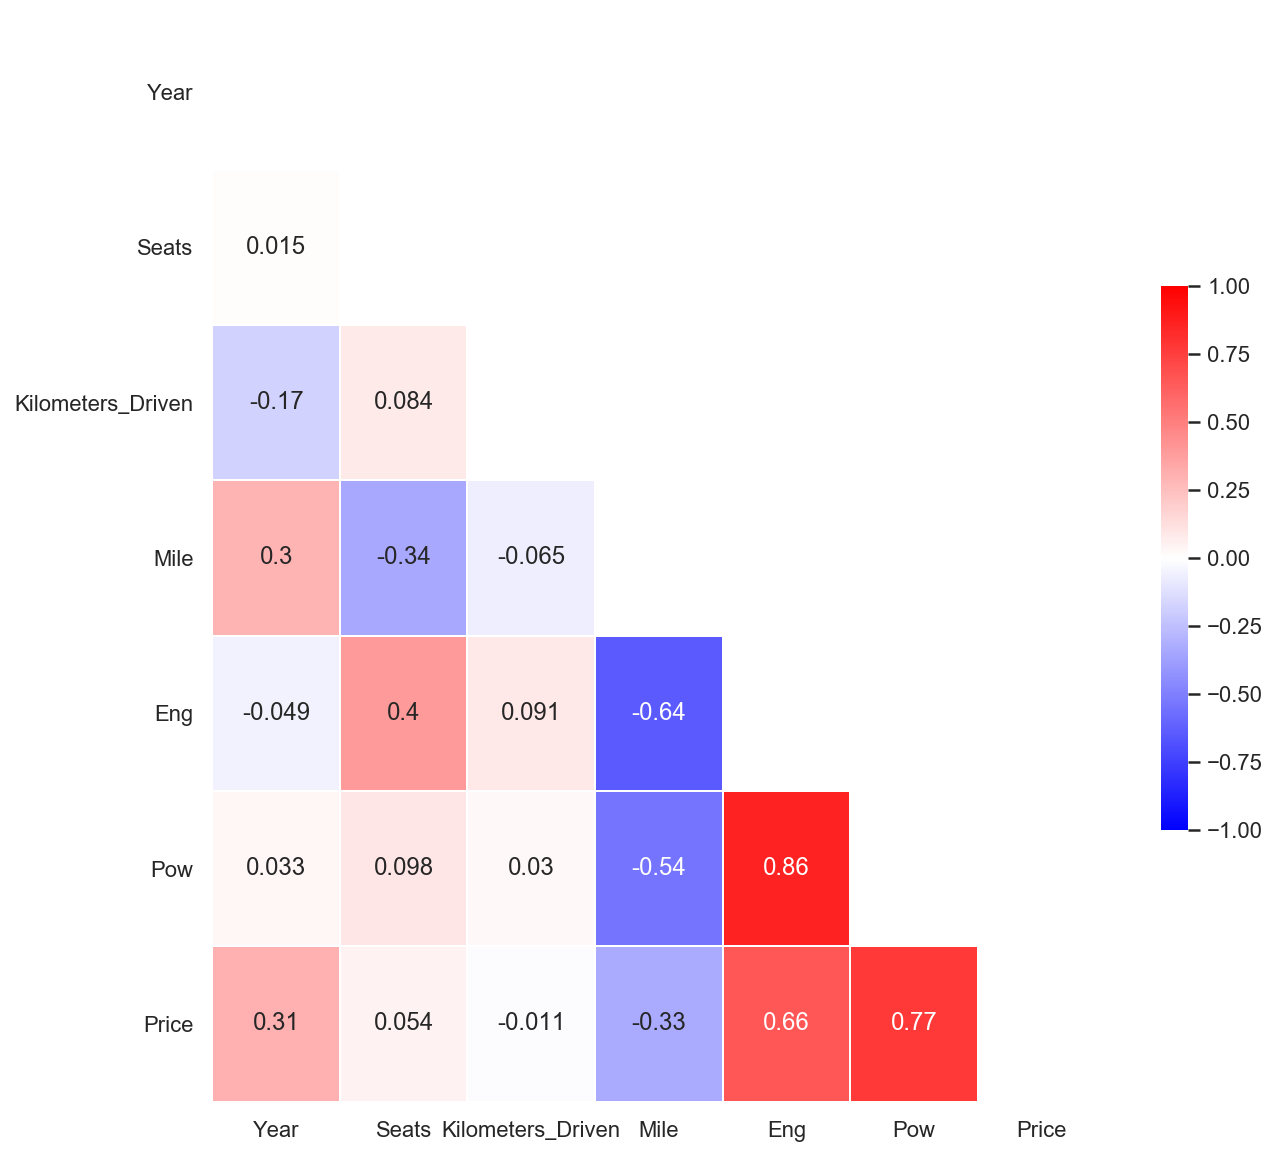

In [164]:
# 주요 변수들로 히트맵
df = car_td[['Year', 'Seats', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Price']].corr()

fig, ax = plt.subplots(figsize=(10,10))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5,  
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

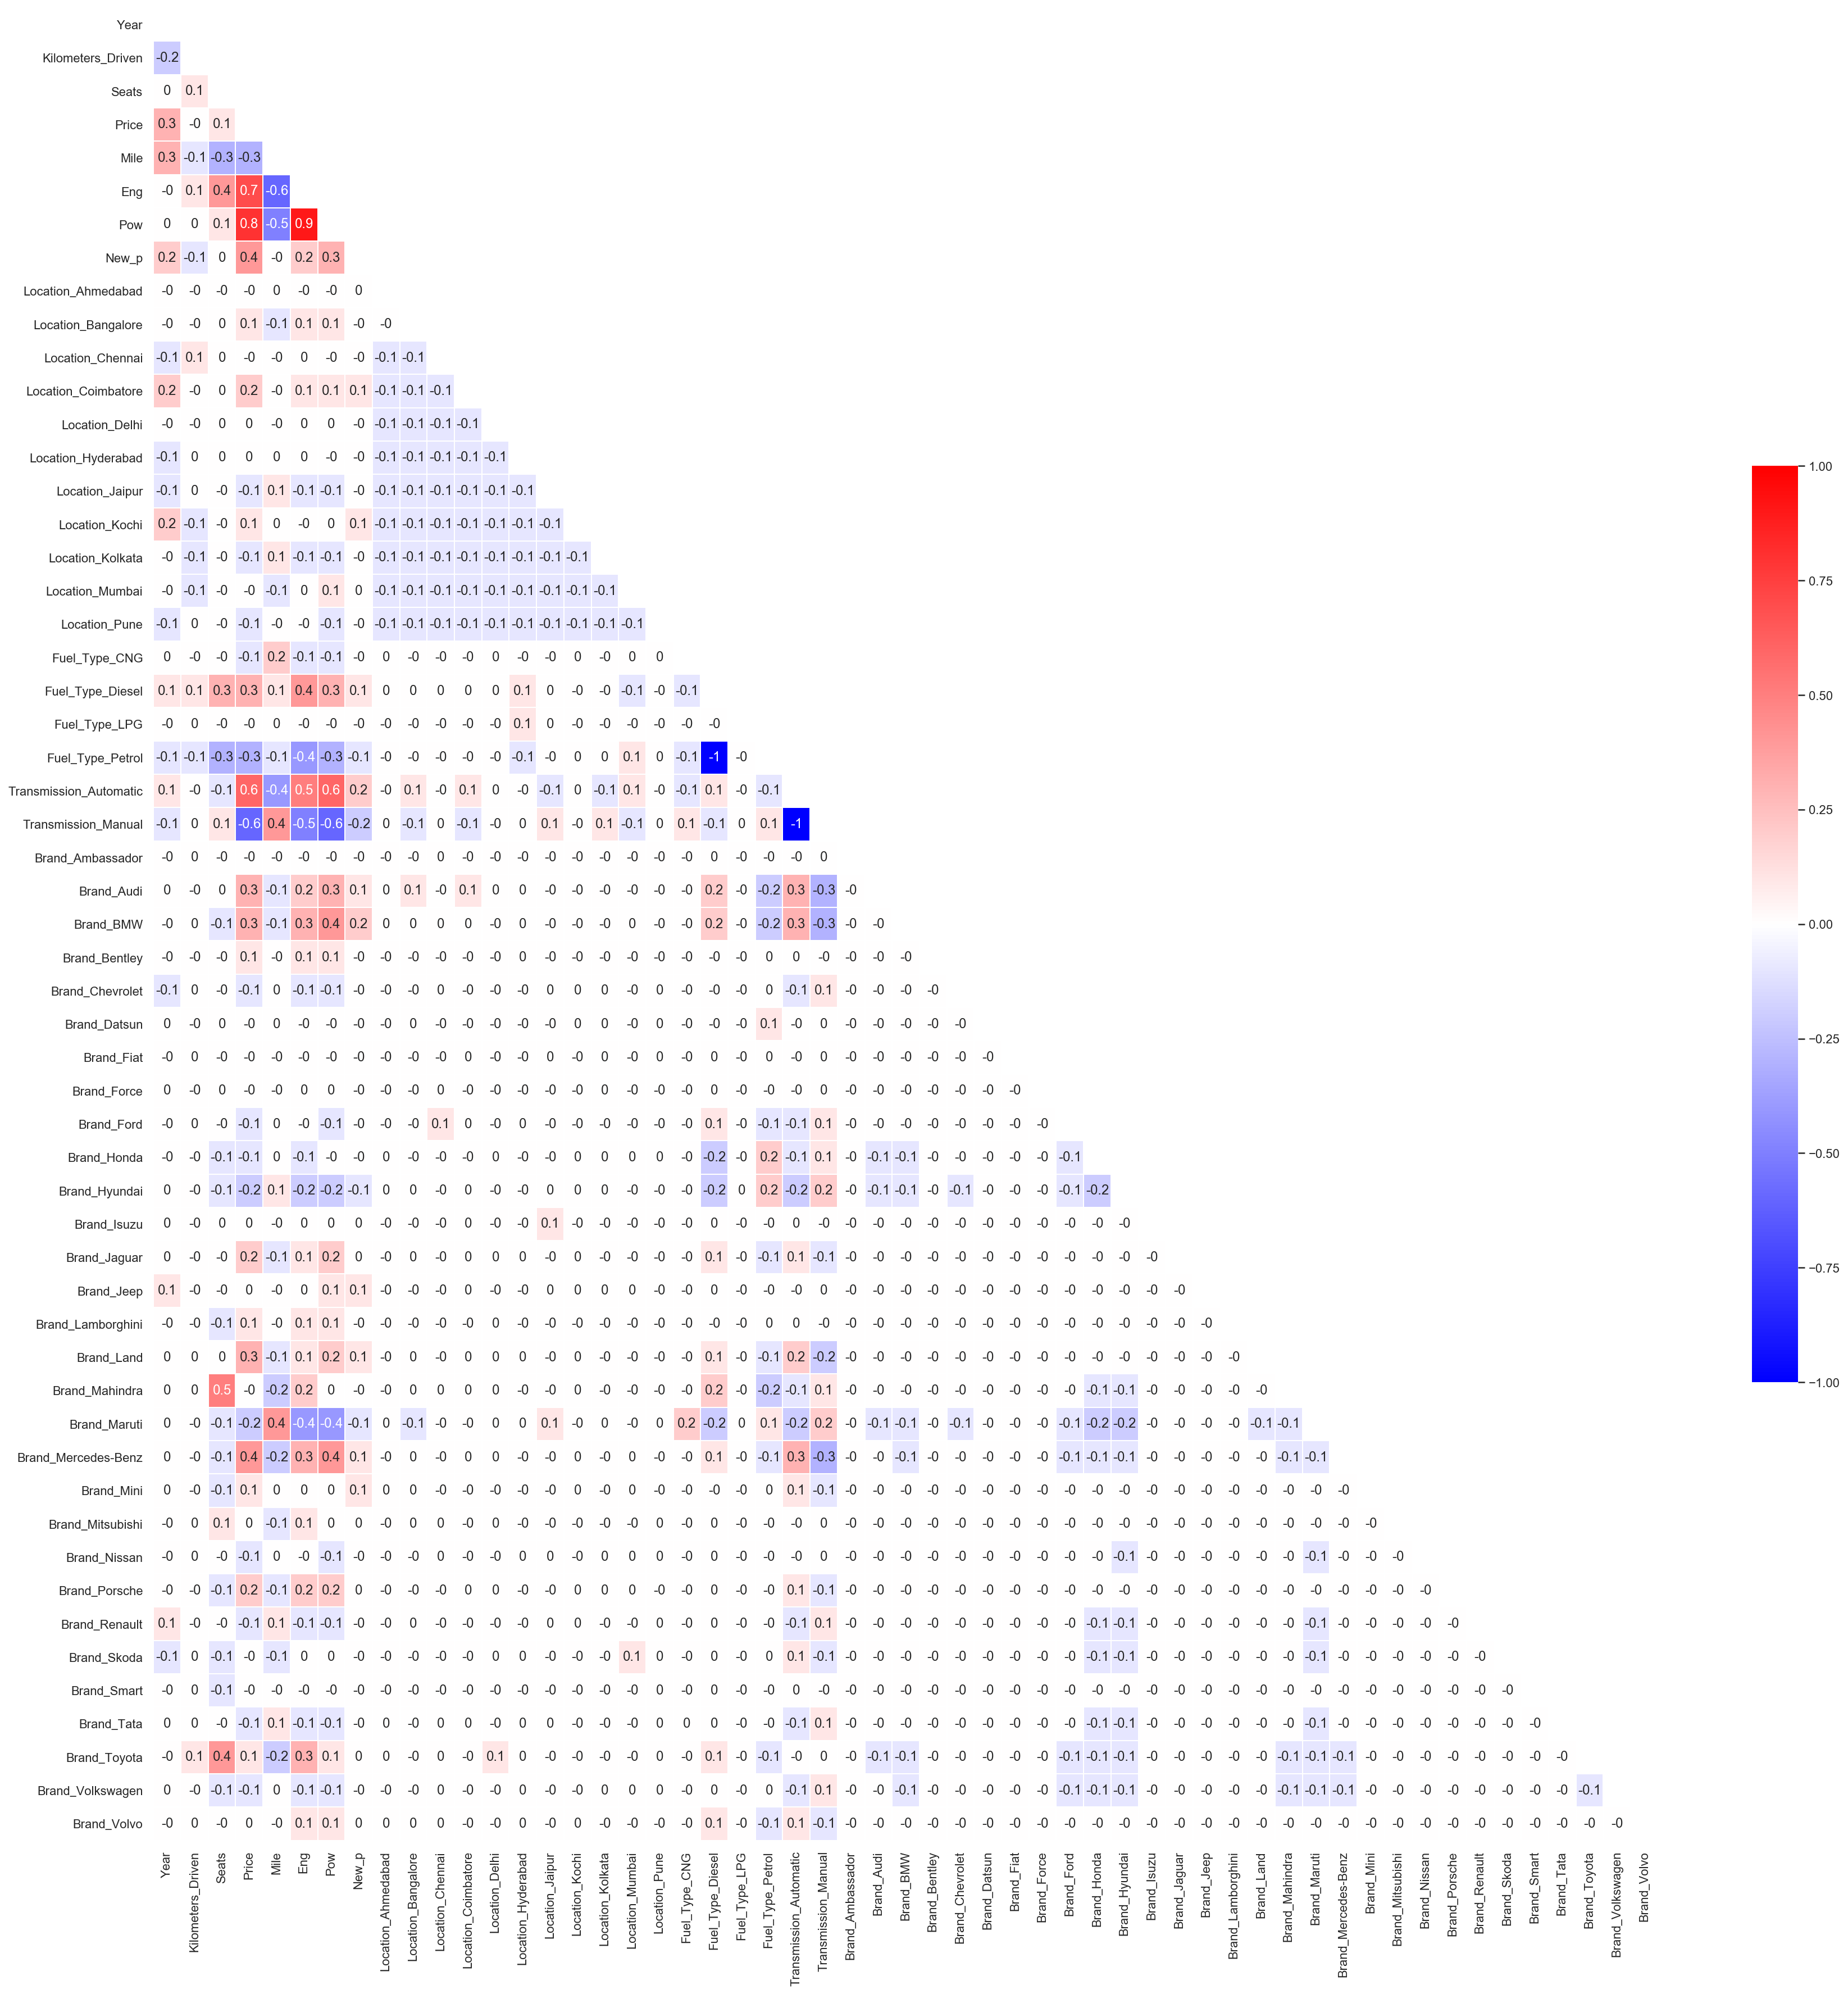

In [165]:
# 모든 컬럼을 변수로 히트맵
df = car_td.corr().round(1)

fig, ax = plt.subplots(figsize=(30,30))

mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df, 
            cmap = 'bwr', 
            annot = True,   
            mask=mask,     
            linewidths=.5, 
            cbar_kws={"shrink": .5},
            vmin = -1,vmax = 1   
           )  
plt.show()

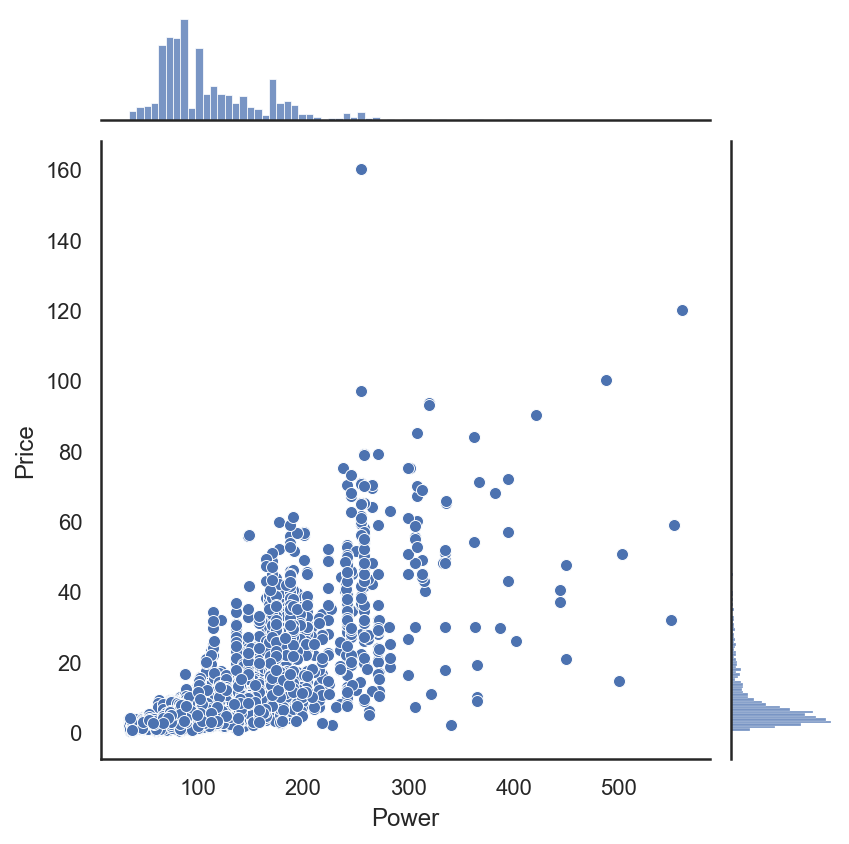

In [167]:
joint = sns.jointplot(x='Pow',y='Price',data=car_td)
joint.set_axis_labels(xlabel='Power',ylabel='Price')
plt.show()

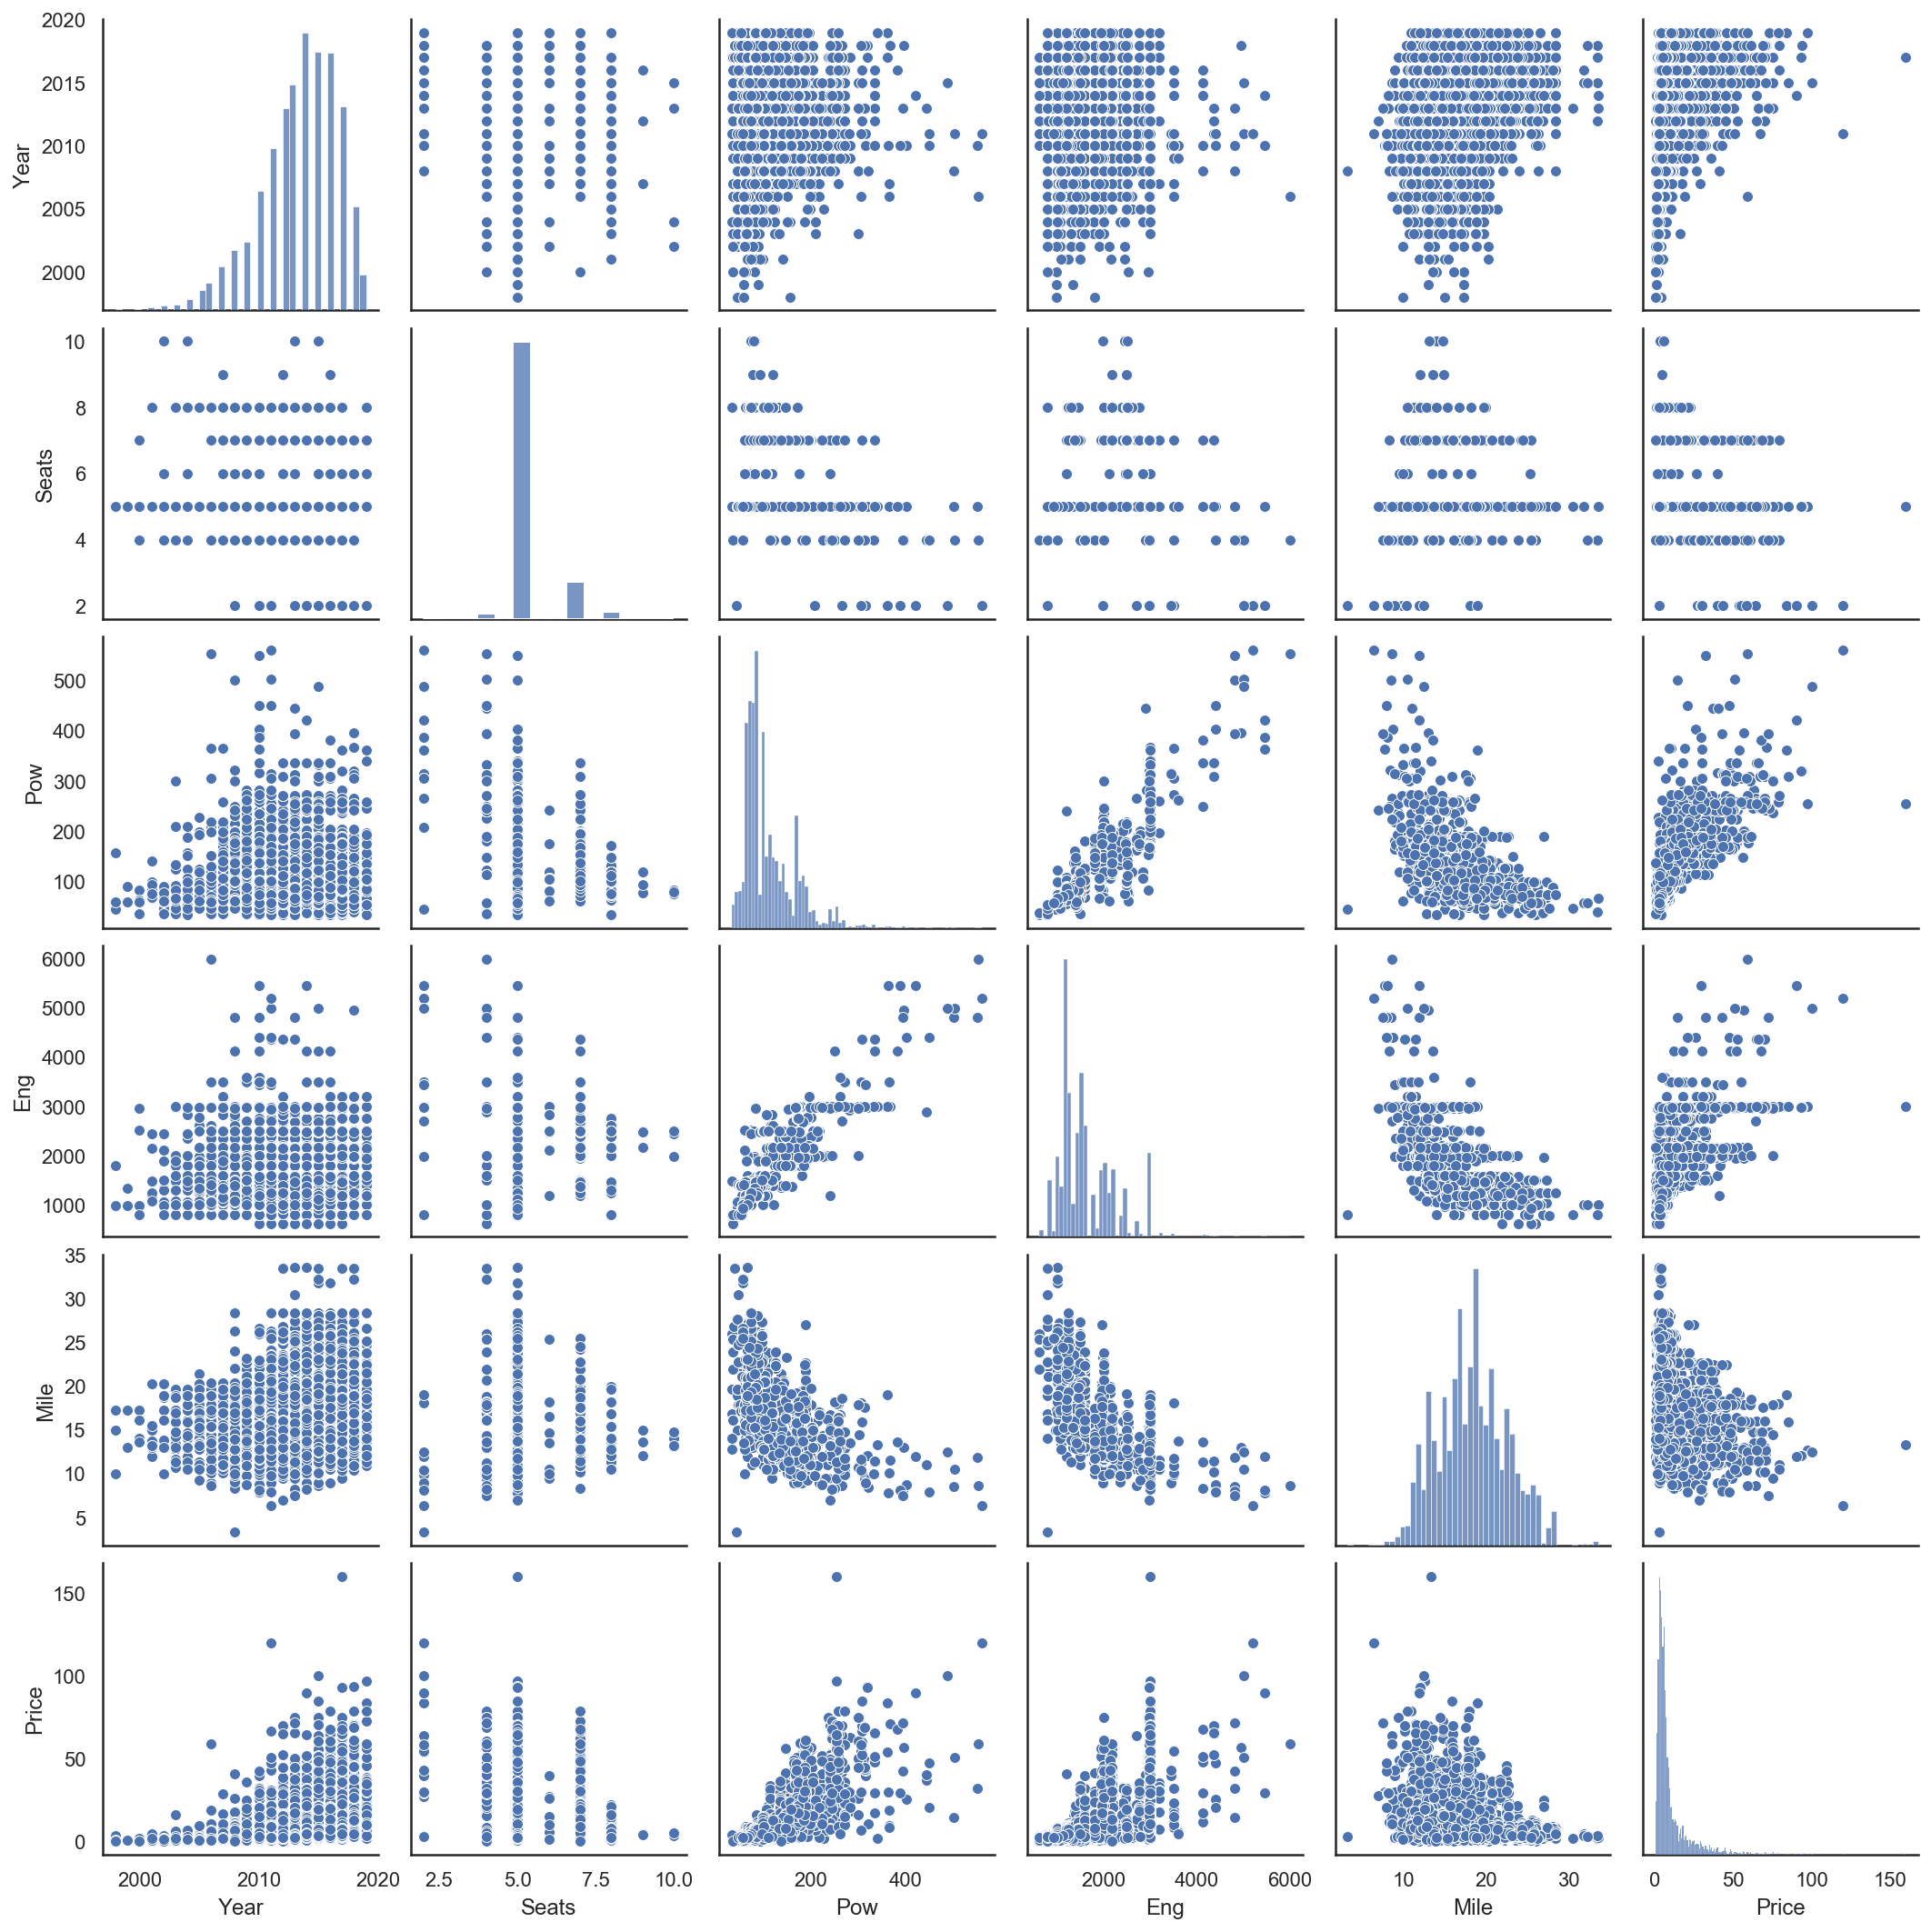

In [168]:
sns.pairplot(data=car_td[['Year','Seats','Pow', 'Eng', 'Mile', 'Price']])
plt.show()

### 3. 모델링 

#### 3-1 LinearRegression 모델

In [169]:
# linear 모델 결과 확인
def get_results(X, y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred_test = reg.predict(X_test)

    print('explained_variance_score: {}'.format(explained_variance_score(pred_test, y_test)))
    print('mean_squared_errors: {}'.format(mean_squared_error(pred_test, y_test)))
    print('r2_score: {}'.format(r2_score(pred_test, y_test)))

##### New Pric가 있는 데이터 

In [170]:
car_td

Year  Kilometers_Driven  Seats  Price                    Car_name  \
0     2010              72000      5   1.75             Wagon R LXI CNG   
1     2015              41000      5  12.50    Creta 1.6 CRDi SX Option   
2     2011              46000      5   4.50                      Jazz V   
3     2012              87000      7   6.00                  Ertiga VDI   
4     2013              40670      5  17.74  A4 New 2.0 TDI Multitronic   
...    ...                ...    ...    ...                         ...   
6012  2014              27365      5   4.75                   Swift VDI   
6013  2015             100000      5   4.00            Xcent 1.1 CRDi S   
6014  2012              55000      8   2.90                Xylo D4 BSIV   
6015  2013              46000      5   2.65                 Wagon R VXI   
6016  2011              47000      5   2.50                 Beat Diesel   

       Mile     Eng     Pow  New_p  Location_Ahmedabad  Location_Bangalore  \
0     26.60   998.0   58.16   0.00                   0                   0   
1     19.67  1582.0  126.20   0.00                   0                   0   
2     18.20  1199.0   88.70   8.61                   0                   0   
3     20.77  1248.0   88.76   0.00                   0                   0   
4     15.20  1968.0  140.80   0.00                   0                   0   
...     ...     ...     ...    ...                 ...                 ...   
6012  28.40  1248.0   74.00   7.88                   0                   0   
6013  24.40  1120.0   71.00   0.00                   0                   0   
6014  14.00  2498.0  112.00   0.00                   0                   0   
6015  18.90   998.0   67.10   0.00                   0                   0   
6016  25.44   936.0   57.60   0.00                   0                   0   

      Location_Chennai  Location_Coimbatore  Location_Delhi  \
0                    0                    0               0   
1                    0                    0               0   
2                    1                    0               0   
3                    1                    0               0   
4                    0                    1               0   
...                ...                  ...             ...   
6012                 0                    0               1   
6013                 0                    0               0   
6014                 0                    0               0   
6015                 0                    0               0   
6016                 0                    0               0   

      Location_Hyderabad  Location_Jaipur  Location_Kochi  Location_Kolkata  \
0                      0                0               0                 0   
1                      0                0               0                 0   
2                      0                0               0                 0   
3                      0                0               0                 0   
4                      0                0               0                 0   
...                  ...              ...             ...               ...   
6012                   0                0               0                 0   
6013                   0                1               0                 0   
6014                   0                1               0                 0   
6015                   0                0               0                 1   
6016                   1                0               0                 0   

      Location_Mumbai  Location_Pune  Fuel_Type_CNG  Fuel_Type_Diesel  \
0                   1              0              1                 0   
1                   0              1              0                 1   
2                   0              0              0                 0   
3                   0              0              0                 1   
4                   0              0              0                 1   
...               ...   

In [171]:
car_td_new = car_td[car_td['New_p'] != 0]
car_td_new.reset_index(drop=True, inplace=True)
X = car_td_new.drop(['Car_name','Price'],axis=1)
y = car_td_new['Price']

get_results(X,y)

explained_variance_score: 0.7883959086970338
mean_squared_errors: 33.78658321235694
r2_score: 0.7882570260049118


In [172]:
car_td_new.head(1)

Year  Kilometers_Driven  Seats  Price Car_name  Mile     Eng   Pow  New_p  \
0  2011              46000      5    4.5   Jazz V  18.2  1199.0  88.7   8.61   

   Location_Ahmedabad  Location_Bangalore  Location_Chennai  \
0                   0                   0                 1   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                0              0   

   Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_LPG  Fuel_Type_Petrol  \
0              0                 0              0                 1   

   Transmission_Automatic  Transmission_Manual  Brand_Ambassador  Brand_Audi  \
0                       0                    1                 0           0   

   Brand_BMW  Brand_Bentley  Brand_Chevrolet  Brand_Datsun  Brand_Fiat  \
0          0              0                0             0           0   

   Brand_Force  Brand_Ford  Brand_Honda  Brand_Hyundai  Brand_Isuzu  \
0            0           0            1              0            0   

   Brand_Jaguar  Brand_Jeep  Brand_Lamborghini  Brand_Land  Brand_Mahindra  \
0             0           0                  0           0               0   

   Brand_Maruti  Brand_Mercedes-Benz  Brand_Mini  Brand_Mitsubishi  \
0             0                    0           0                 0   

   Brand_Nissan  Brand_Porsche  Brand_Renault  Brand_Skoda  Brand_Smart  \
0             0              0              0            0            0   

   Brand_Tata  Brand_Toyota  Brand_Volkswagen  Brand_Volvo  
0           0             0                 0            0

##### New peice가 없는 데이터 

In [173]:
def get_results2(x, y):

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

    reg = LinearRegression()
    reg.fit(x_train, y_train)

    pred_test = reg.predict(x_test)

    
    return(mean_squared_error(pred_test, y_test))

In [174]:
# ls_1000 = []

# for _ in range(0,10000):
#     car_8s = car_td[car_td['New_p'] == 0].sample(n=823)

#     car_8s.reset_index(drop=True, inplace=True)

#     x = car_8s.drop(['Car_name','Price'], axis=1)
#     y = car_8s['Price']

#     ls_1000.append(get_results2(x, y))

# ls_1000_pd = pd.DataFrame(ls_1000)

# len(ls_1000_pd[ls_1000_pd[0]>=46])/10000*100

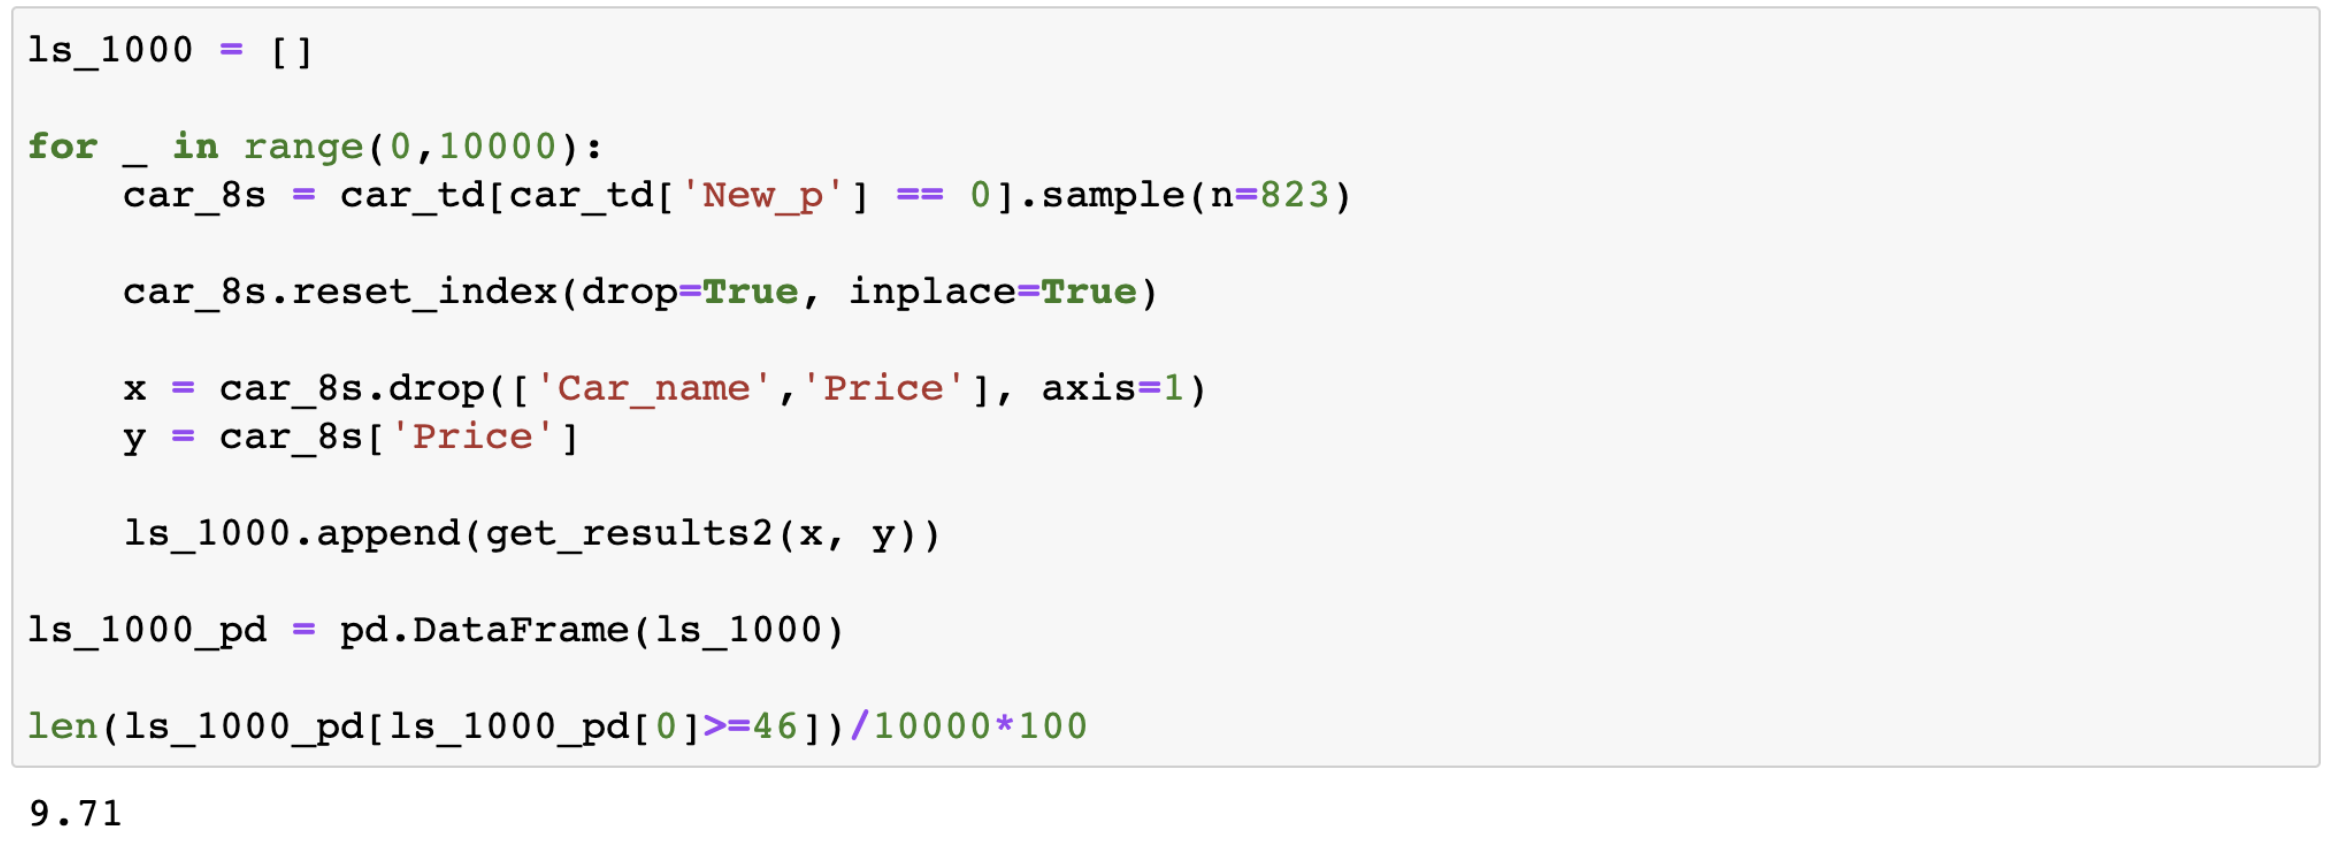

In [175]:
# new price columns 삭제
car_td.drop(['New_p'], axis=1, inplace=True)

In [176]:
X = car_td.drop(['Car_name', 'Price', 'Seats'], axis=1)
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7203088274973453
mean_squared_errors: 27.219746603842097
r2_score: 0.7190062973946492


#### 3-2. 다중공산성

In [177]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7229835987093132
mean_squared_errors: 27.082376644604807
r2_score: 0.7218584862796551


In [178]:
# 로그
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.9165752566835298
mean_squared_errors: 0.011452974939501355
r2_score: 0.9165707764587846


In [179]:
math.pow(10,0.011452974939501334)

1.0267222529814608

In [180]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Pow'], axis=1) # Pow제거
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.6841441860963999
mean_squared_errors: 29.692204701983194
r2_score: 0.682702842428807


In [181]:
# 로그
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Pow'], axis=1) # Pow제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.901440449679999
mean_squared_errors: 0.01321019479403817
r2_score: 0.901440270796902


### 4. Scaler

#### 4-1.MinMax Scaler

In [182]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X = mm.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7229835987109772
mean_squared_errors: 27.0823766444974
r2_score: 0.7218584862813112


In [183]:
X = mm.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng','Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.6729808116803291
mean_squared_errors: 30.806771566117817
r2_score: 0.6716705042806127


#### 4-2. Standard Scaler

In [187]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = ss.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 3.2940317140628395e-13
mean_squared_errors: 8.144273320820213e+23
r2_score: -0.0005540166201862817


#### 4-3. RobustScaler

In [188]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X = rs.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.7229835987109787
mean_squared_errors: 27.08237664449743
r2_score: 0.721858486281312


In [189]:
rs = RobustScaler()
X = rs.fit_transform(car_td.drop(['Car_name', 'Price', 'Seats', 'Eng','Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'], axis=1))
y = car_td['Price']

get_results(X, y)

explained_variance_score: 0.6729808116803296
mean_squared_errors: 30.806771566117842
r2_score: 0.6716705042806124


### 5. 정확도 

In [190]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1)
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.7671415608719592
Accuracy on Testing set:  0.7846907104962093


In [191]:
# 로그
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1)
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Training set:  0.9242938029667035
Accuracy on Testing set:  0.9246452582504395


### 6. Cross validation

In [192]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [193]:
skf = StratifiedKFold(n_splits=5)
kf = KFold(n_splits=5)

In [194]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

In [195]:
reg = LinearRegression()

In [196]:
cross_validate(reg, X, y, cv=kf)

{'fit_time': array([0.00851989, 0.00870109, 0.00991488, 0.00875401, 0.00920415]),
 'score_time': array([0.0021379 , 0.00267601, 0.00303984, 0.00242877, 0.0023849 ]),
 'test_score': array([0.77979944, 0.60609284, 0.7781031 , 0.70929998, 0.78724735])}

In [197]:
score = cross_val_score(reg, X, y, cv=kf)
score.mean()

0.732108543688653

In [198]:
# 로그변환

In [199]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

In [200]:
reg = LinearRegression()

In [201]:
cross_validate(reg, X, y, cv=kf)

{'fit_time': array([0.0090971 , 0.00966978, 0.00876498, 0.00846386, 0.00922012]),
 'score_time': array([0.00258994, 0.00265598, 0.00269723, 0.00297999, 0.0024662 ]),
 'test_score': array([0.93129577, 0.89337362, 0.9128456 , 0.92205216, 0.92577189])}

In [202]:
score = cross_val_score(reg, X, y, cv=kf)
score.mean()

0.9170678071131496

### 7. Column 제거 

In [203]:
'Fuel_Type_CNG', 'Fuel_Type_LPG', 'Brand_Smart', 'Brand_Bentley', 'Brand_Lamborghini', 'Brand_Ambassador', 'Brand_Isuzu', 'Brand_Force', 'Brand_Datsun', 'Brand_Jeep', 'Brand_Porsche', 'Brand_Volvo', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Fiat', 'Brand_Jaguar', 'Brand_Land', 'Brand_Nissan'

('Fuel_Type_CNG',
 'Fuel_Type_LPG',
 'Brand_Smart',
 'Brand_Bentley',
 'Brand_Lamborghini',
 'Brand_Ambassador',
 'Brand_Isuzu',
 'Brand_Force',
 'Brand_Datsun',
 'Brand_Jeep',
 'Brand_Porsche',
 'Brand_Volvo',
 'Brand_Mini',
 'Brand_Mitsubishi',
 'Brand_Fiat',
 'Brand_Jaguar',
 'Brand_Land',
 'Brand_Nissan')

In [204]:
# Nissan             91
# Land               60
# Jaguar             40
# Fiat               28
# Mitsubishi         27
# Mini               26
# Volvo              21
# Porsche            18
# Jeep               15
# Datsun             13
# Force               3
# Isuzu               3
# Bentley             1
# Lamborghini         1
# Ambassador          1
# Smart               1

In [205]:
# Maruti           1211
# Hyundai          1107
# Honda             608
# Toyota            410
# Mercedes-Benz     318
# Volkswagen        315
# Ford              300
# Mahindra          271
# BMW               267
# Audi              236
# Tata              186
# Skoda             173
# Renault           145
# Chevrolet         121

### 8. MSE

In [206]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

get_results(X,y)

explained_variance_score: 0.7229835987093132
mean_squared_errors: 27.082376644604807
r2_score: 0.7218584862796551


In [207]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

get_results(X,y)

explained_variance_score: 0.9165752566835298
mean_squared_errors: 0.011452974939501355
r2_score: 0.9165707764587846


In [208]:
math.pow(10,0.011452974939501334)

1.0267222529814608

### 9 브랜드별 그래프 

In [209]:
car_t['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG'], dtype=object)

In [210]:
car_t = car_t[(car_t['Fuel_Type'] == 'Diesel') | (car_t['Fuel_Type'] == 'Petrol')]

In [211]:
car_t['Fuel_Type'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [212]:
def get_Brand_df(Brand):
    car = car_t[car_t['Brand'] == Brand]

    car.reset_index(drop=True, inplace=True)

    car['Owner'] = range(0,len(car))

    for i in range(0,len(car)):
        if car['Owner_Type'][i] == 'First':
            car['Owner'][i] = 1

        elif car['Owner_Type'][i] == 'Second':
            car['Owner'][i] = 2

        elif car['Owner_Type'][i] == 'Third':
            car['Owner'][i] = 3

        elif car['Owner_Type'][i] == 'Fourth & Above':
            car['Owner'][i] = 4

    car = pd.get_dummies(car, columns=['Location','Fuel_Type', 'Transmission'])

    car = car.drop(['Name', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'New_p'], axis=1)

    return(car)

In [218]:
def get_graph(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    reg = LinearRegression()
    reg.fit(X_train, y_train)

    predicted = reg.predict(X_test)

    actual = y_test

    act_df = pd.DataFrame(actual)
    pred_df = pd.DataFrame(predicted)

    act_df.reset_index(inplace=True)

    act_pred_df = pd.concat([act_df, pred_df], axis=1)

    act_pred_df.columns = ['index','actual', 'predicted']

    plt.figure(figsize=(10,5))
    plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

    plt.xlabel('predicted', fontsize=14)

    plt.ylabel('actual', fontsize=14)
    plt.axis([0, 10, 0, 10])  
    line = plt.plot([0,10], [0,10])
    plt.setp(line, color='r', linewidth=3.0)

    plt.show()

In [219]:
def get_graph_rf(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)

    predicted = rf_reg.predict(X_test)

    actual = y_test

    act_df = pd.DataFrame(actual)
    pred_df = pd.DataFrame(predicted)

    act_df.reset_index(inplace=True)

    act_pred_df = pd.concat([act_df, pred_df], axis=1)

    act_pred_df.columns = ['index','actual', 'predicted']

    plt.figure(figsize=(10,5))
    plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

    plt.xlabel('predicted', fontsize=14)

    plt.ylabel('actual', fontsize=14)
    plt.title(X['Brand'])
    plt.axis([0, 10, 0, 10])  
    line = plt.plot([0,10], [0,10])
    plt.setp(line, color='r', linewidth=3.0)

    plt.show()

Hyundai
explained_variance_score: 0.7759366672016152
mean_squared_errors: 1.913035428430212
r2_score: 0.7759312916802419
None


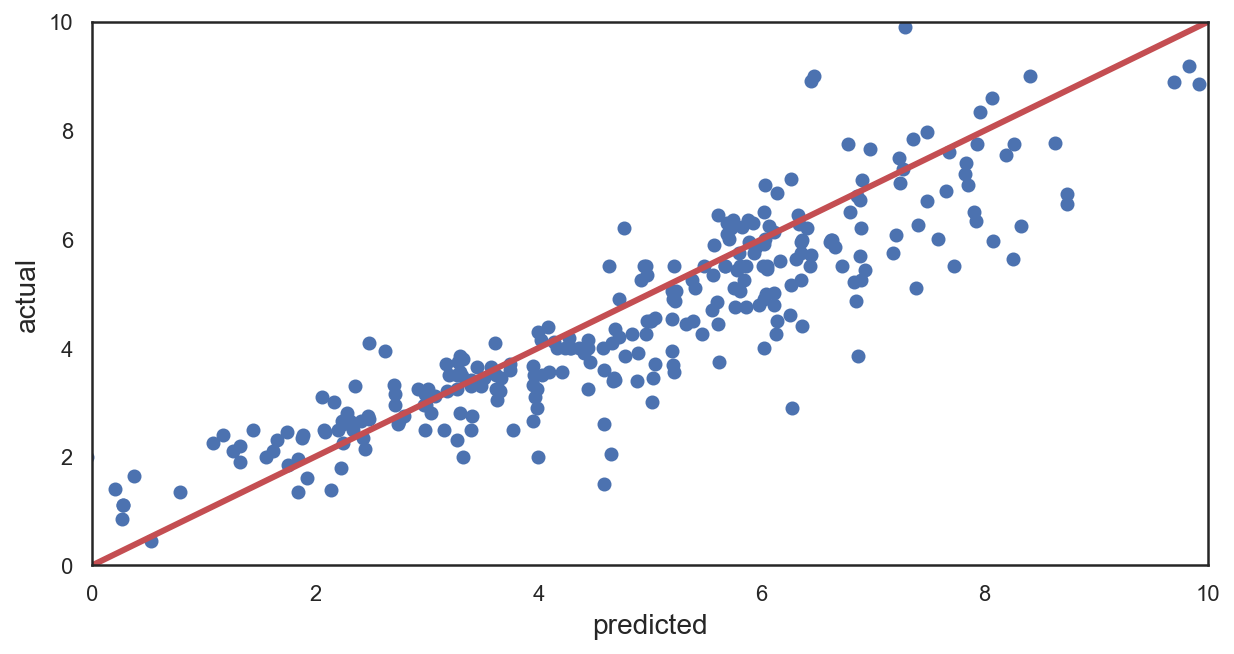

None
Honda
explained_variance_score: 0.6994262407563483
mean_squared_errors: 1.66243552879521
r2_score: 0.6989676231163606
None


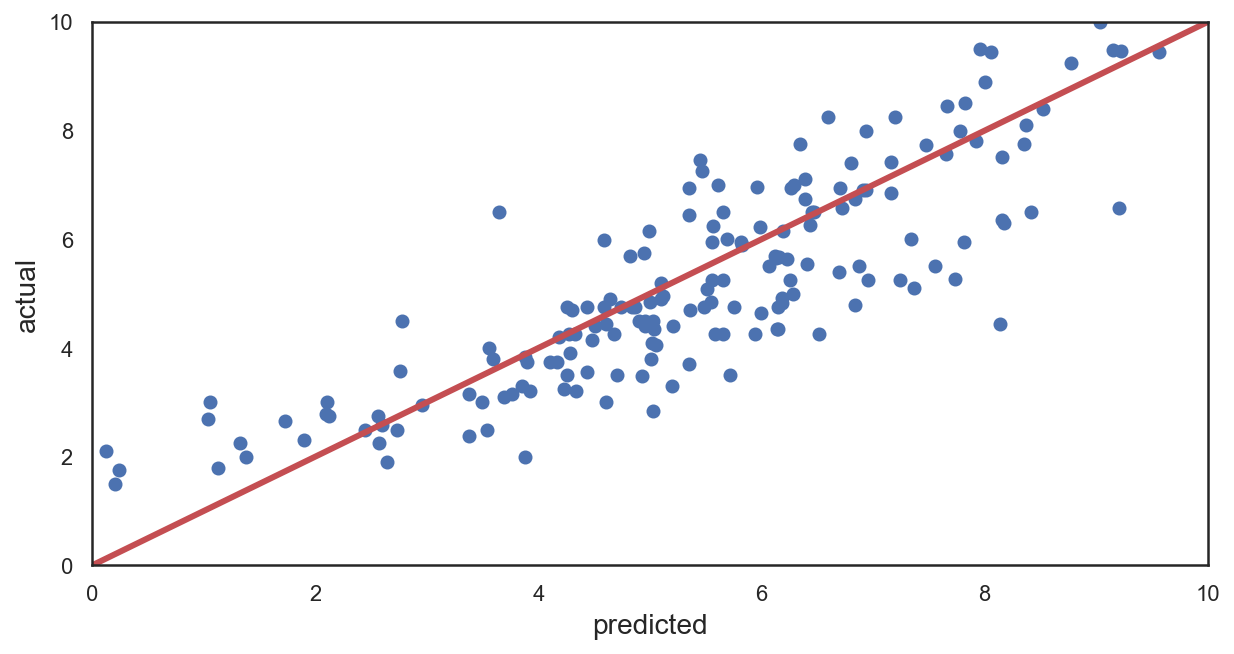

None
Maruti
explained_variance_score: 0.7874291031883205
mean_squared_errors: 0.9148368677033238
r2_score: 0.7867239913675053
None


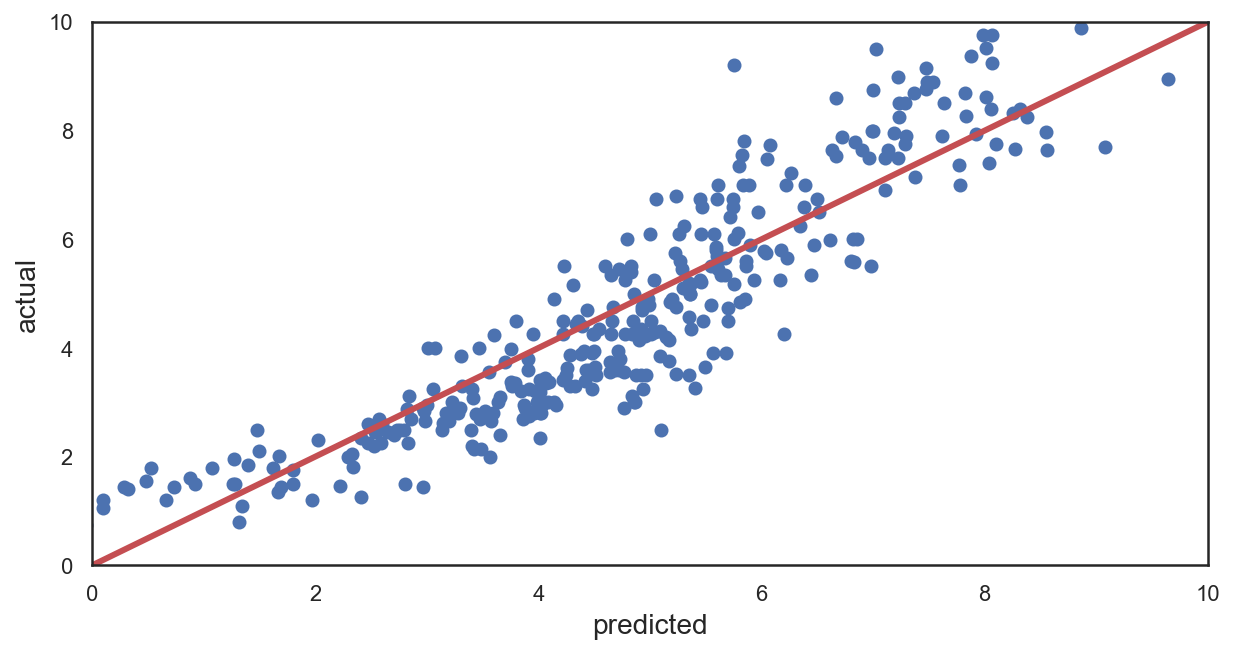

None
Audi
explained_variance_score: 0.522788585210807
mean_squared_errors: 55.47150756962998
r2_score: 0.5227813860646351
None


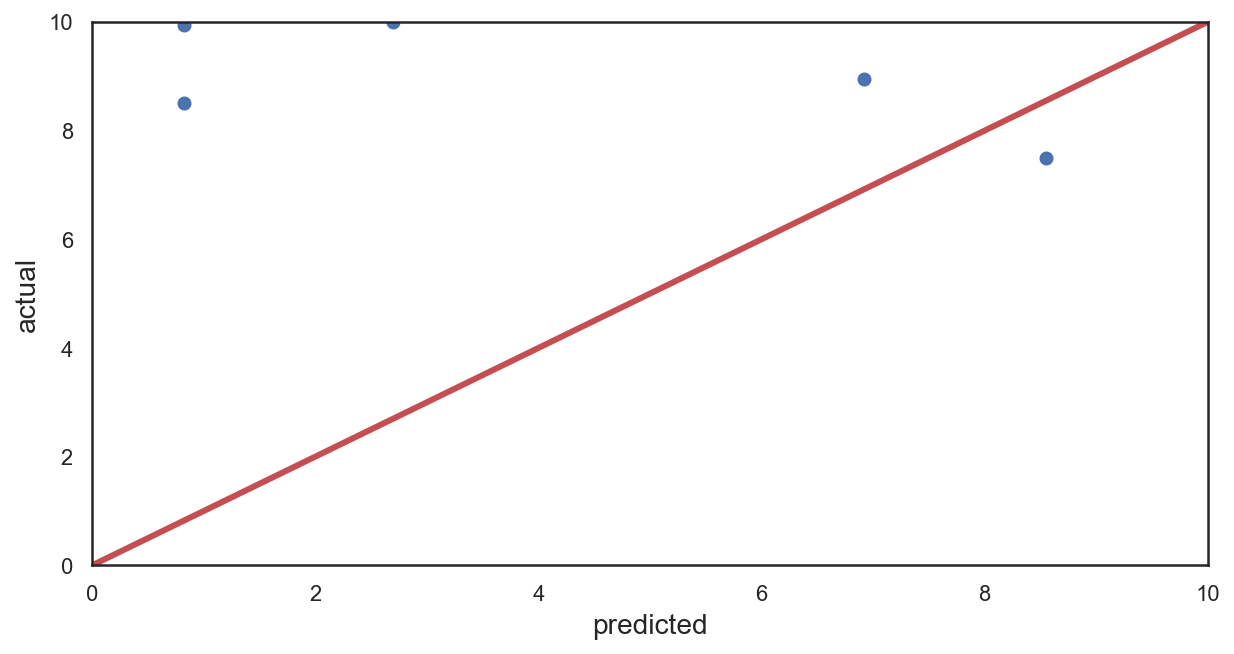

None
Nissan
explained_variance_score: 0.6653598070360947
mean_squared_errors: 0.846966005662264
r2_score: 0.6437814566362561
None


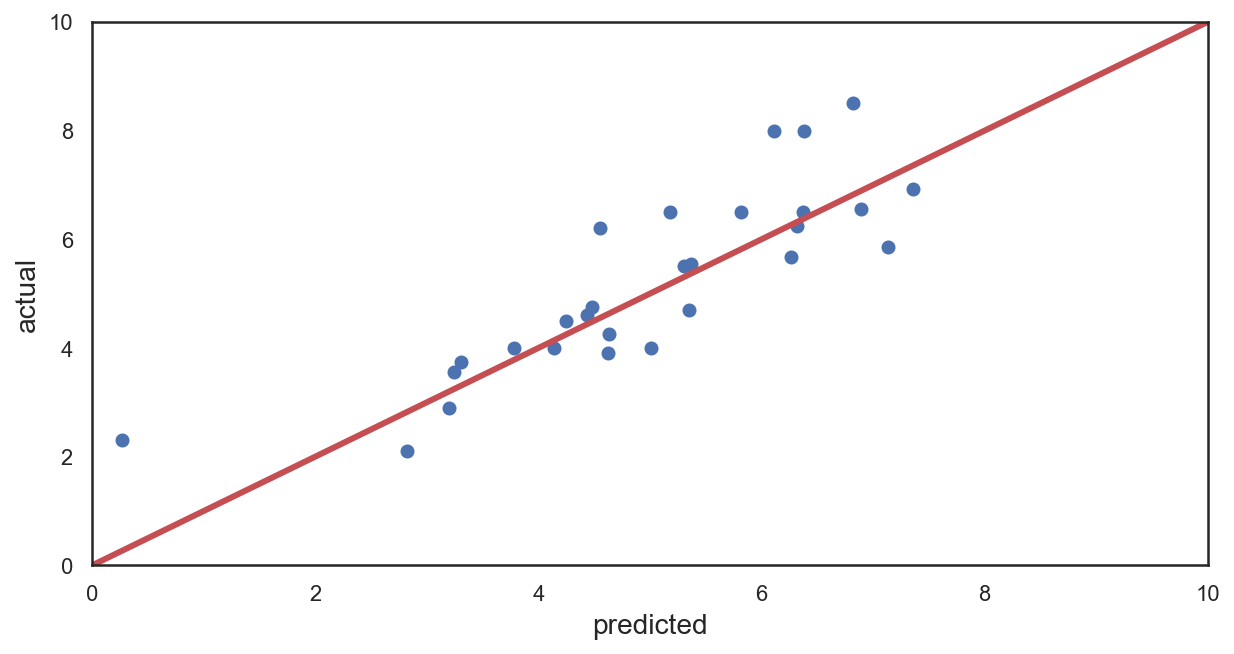

None
Toyota
explained_variance_score: 0.7323850416219968
mean_squared_errors: 12.138475925450134
r2_score: 0.7320868039453106
None


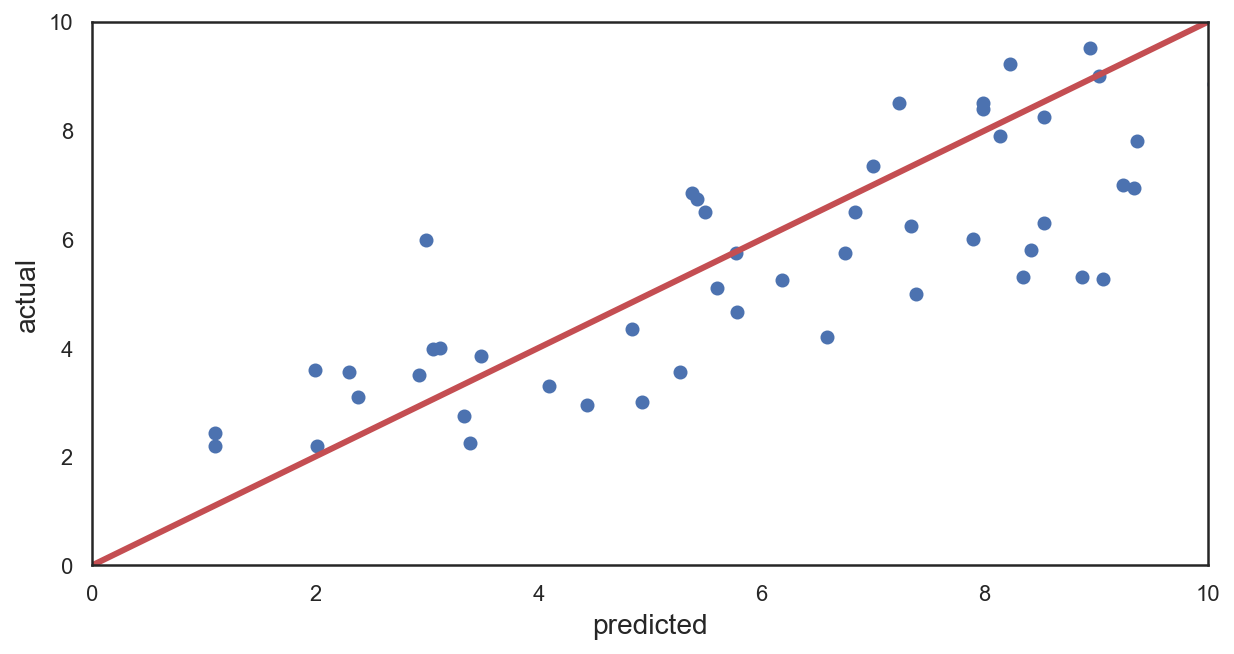

None
Volkswagen
explained_variance_score: 0.34548307398850475
mean_squared_errors: 2.670941272249403
r2_score: 0.33490313564907226
None


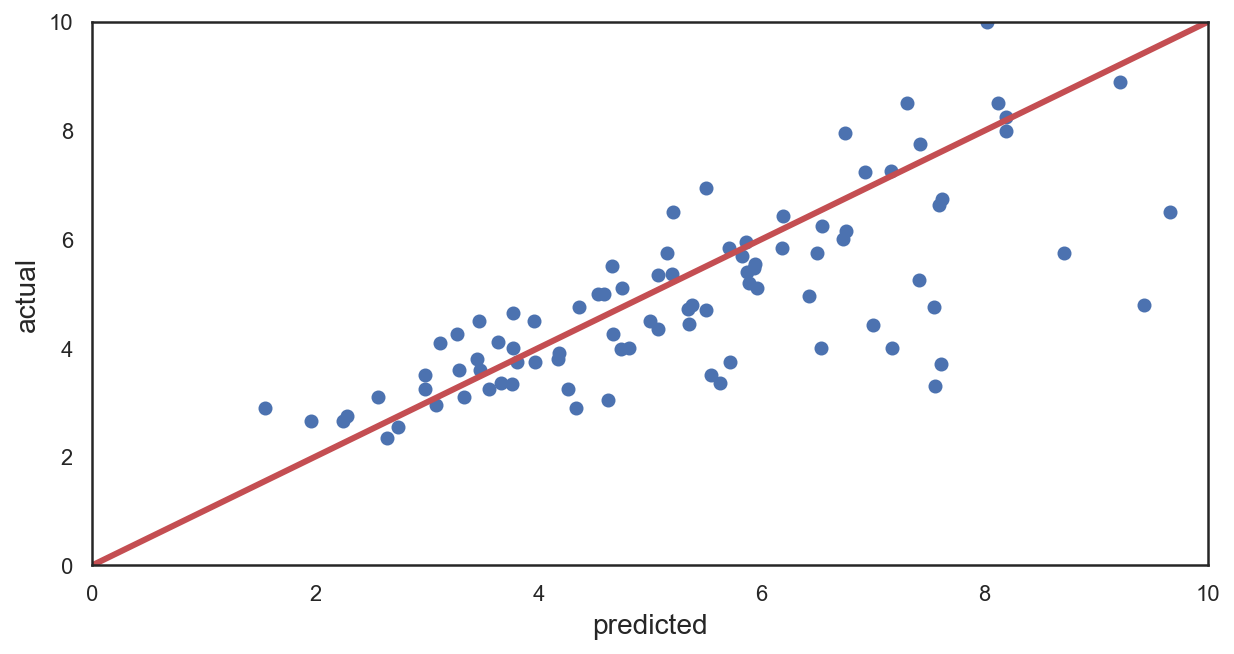

None
Tata
explained_variance_score: 0.5446881053288962
mean_squared_errors: 2.2082500003650436
r2_score: 0.4704576517731106
None


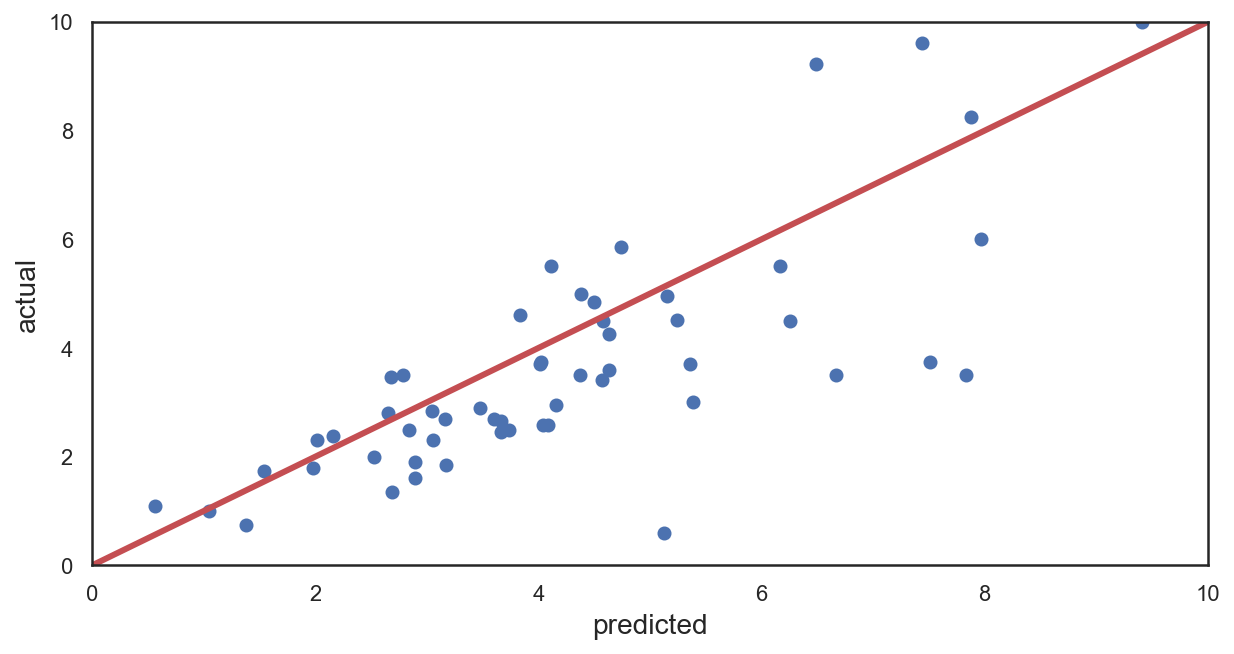

None
Land
explained_variance_score: 0.6469054863933125
mean_squared_errors: 297.55970197864343
r2_score: 0.6272867135245492
None


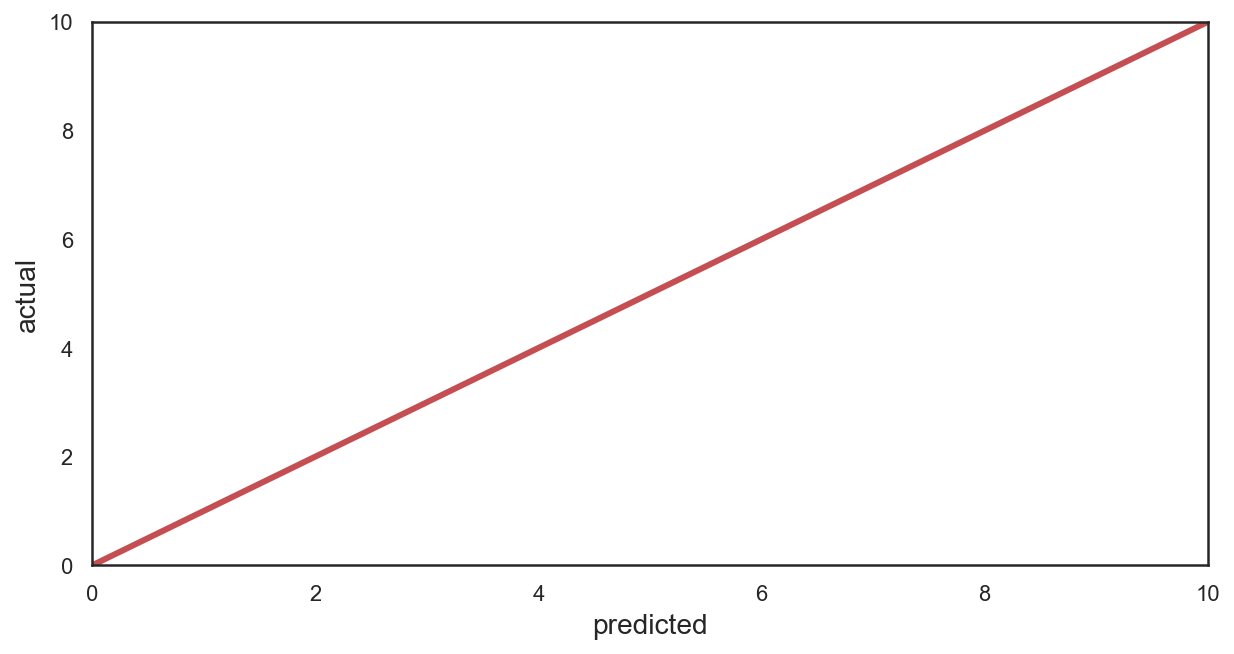

None
Mitsubishi
explained_variance_score: 0.8181506058958072
mean_squared_errors: 23.084883315175627
r2_score: 0.7608054949332047
None


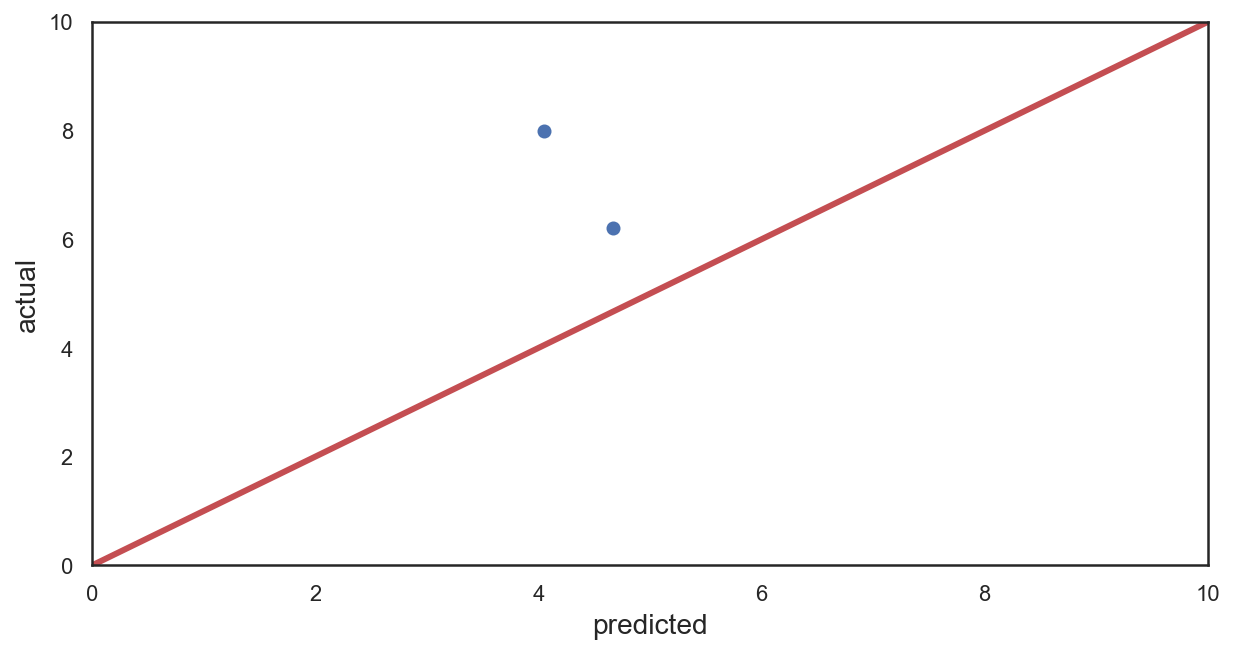

None
Renault
explained_variance_score: 0.7775231537799365
mean_squared_errors: 1.2456566252566903
r2_score: 0.7616533352812804
None


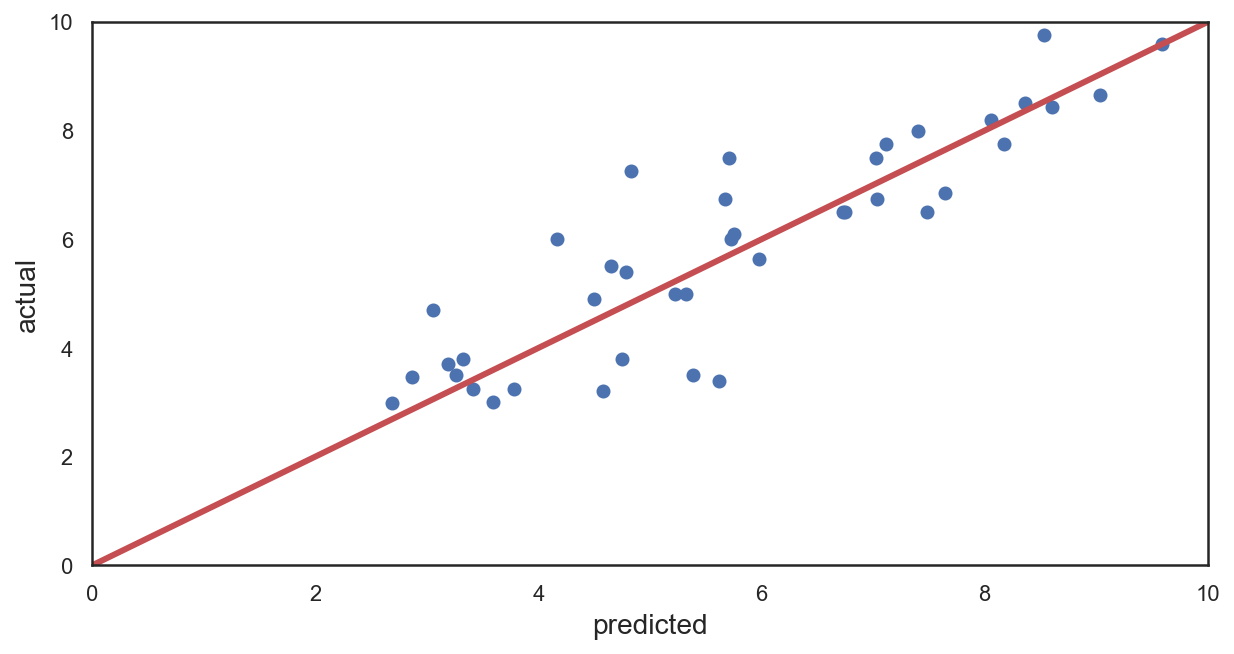

None
Mercedes-Benz
explained_variance_score: 0.5475162163942836
mean_squared_errors: 81.48332651103841
r2_score: 0.5461424690779338
None


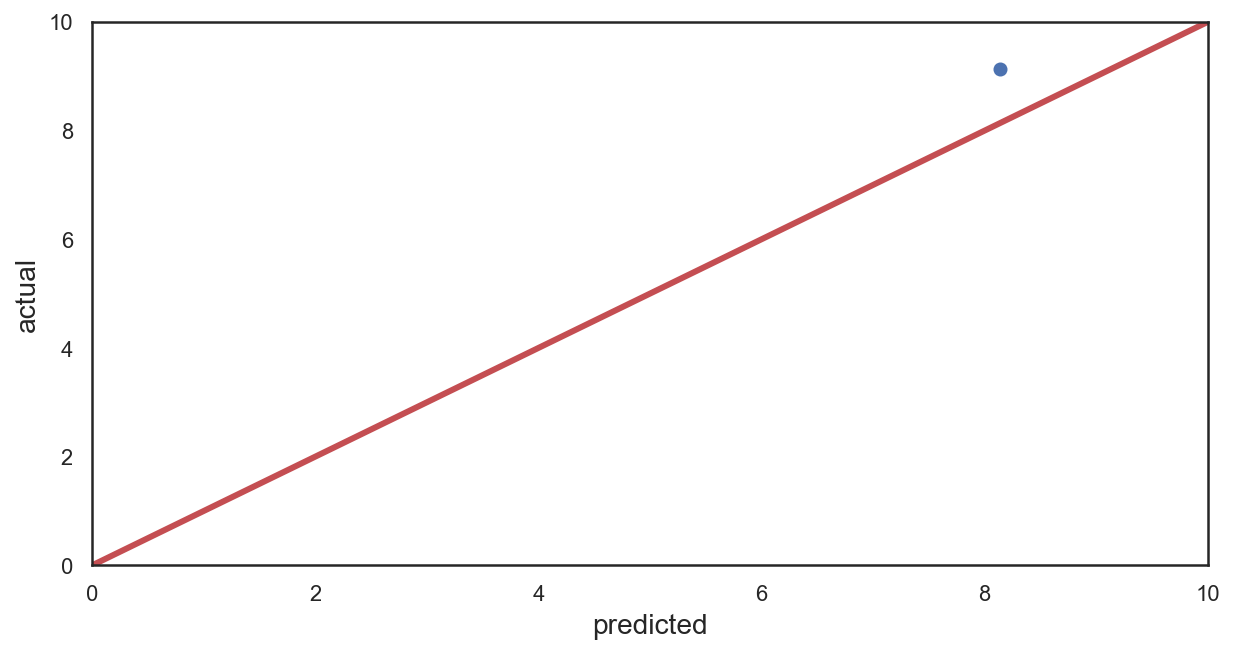

None
BMW
explained_variance_score: -0.05331923064346955
mean_squared_errors: 366.9241312545317
r2_score: -0.06238329055878067
None


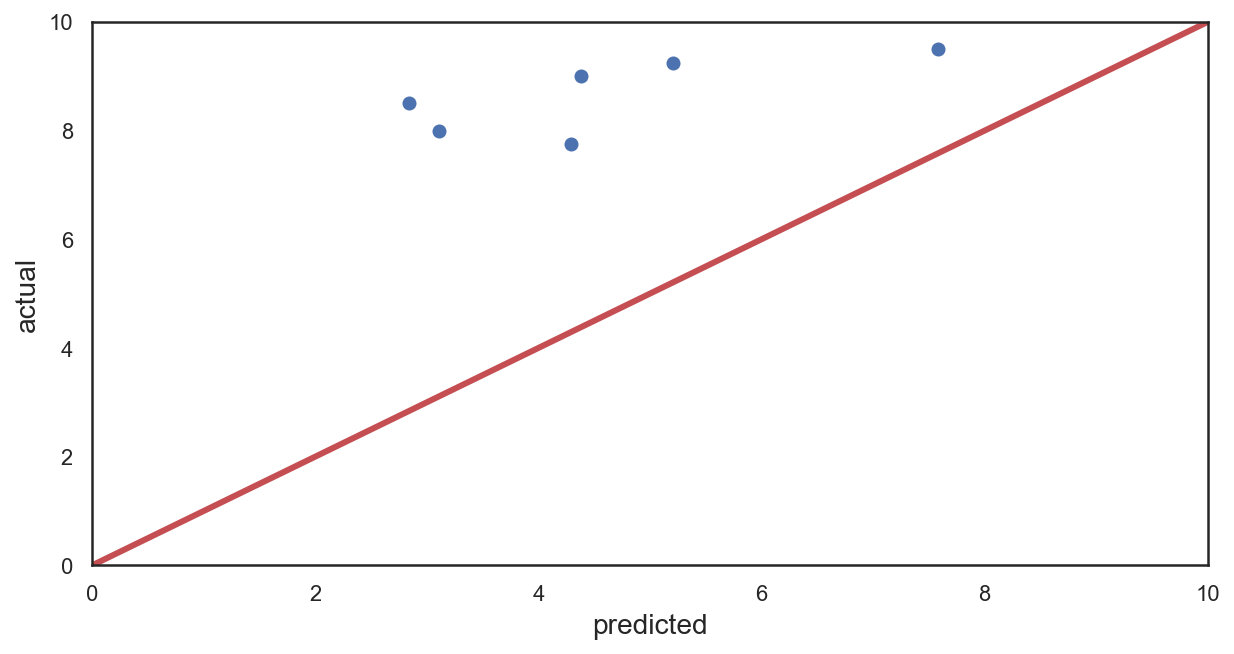

None
Mahindra
explained_variance_score: 0.6305789327247995
mean_squared_errors: 3.2541848492017493
r2_score: 0.6289954169600729
None


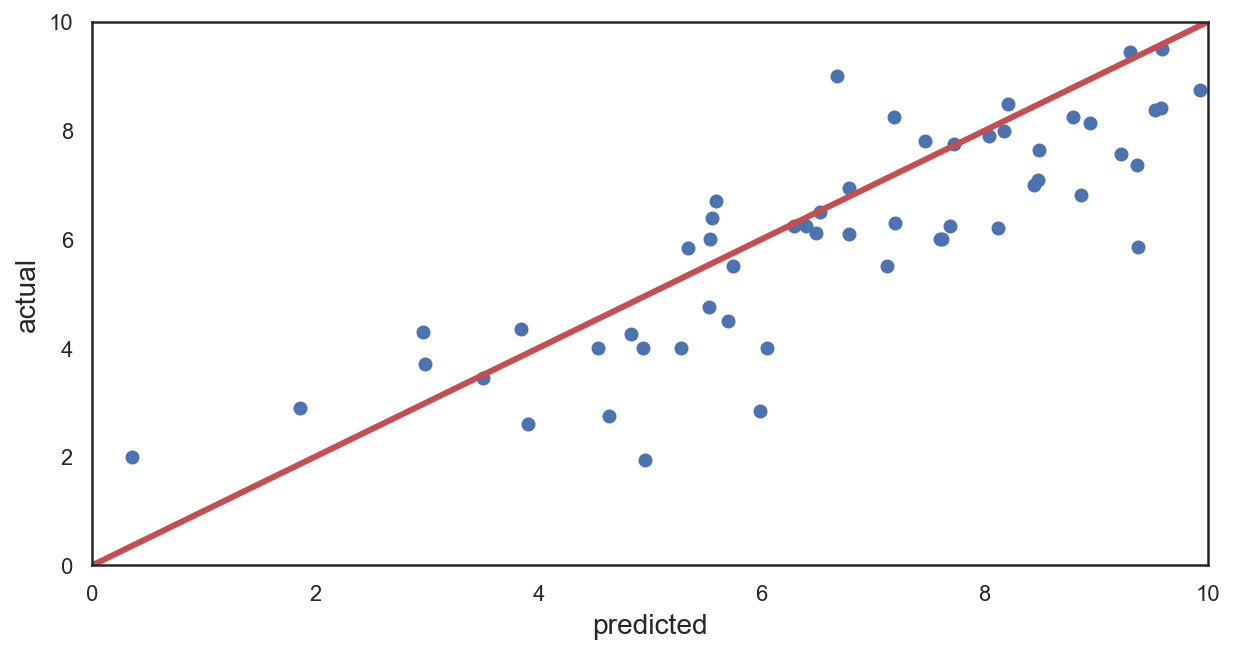

None
Ford
explained_variance_score: 0.821406344924455
mean_squared_errors: 11.50249806829392
r2_score: 0.8210749260767283
None


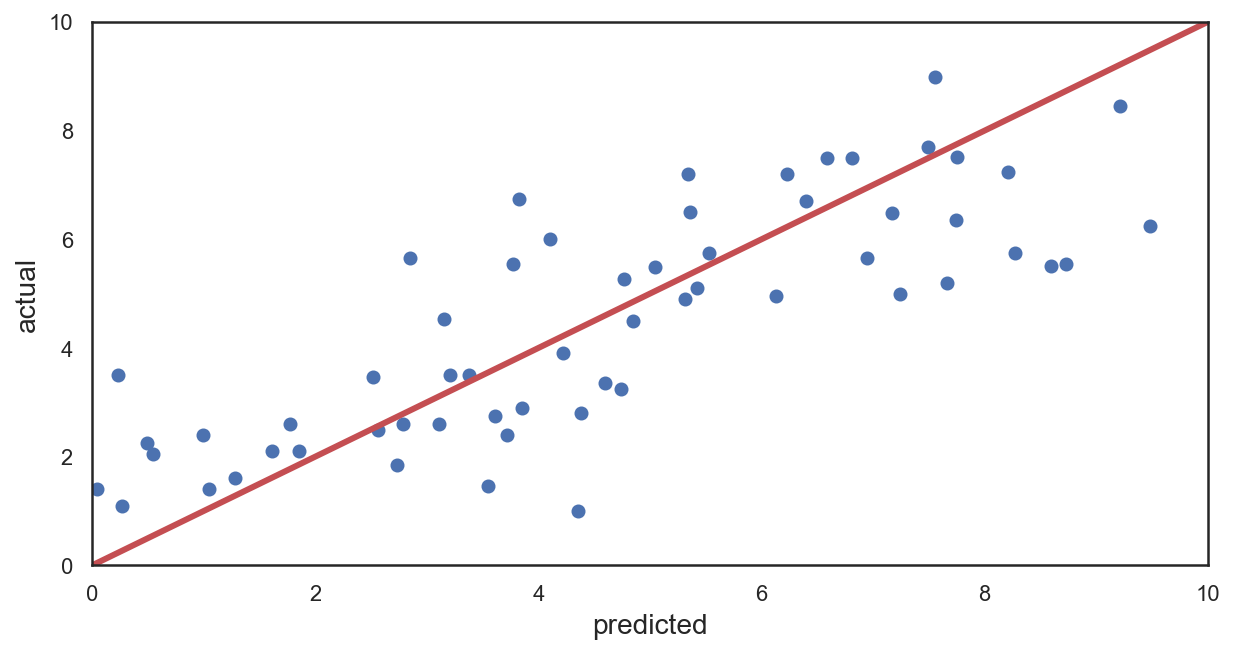

None
Porsche
explained_variance_score: 0.2519916568478433
mean_squared_errors: 2556.6012980754635
r2_score: 0.05737394686785047
None


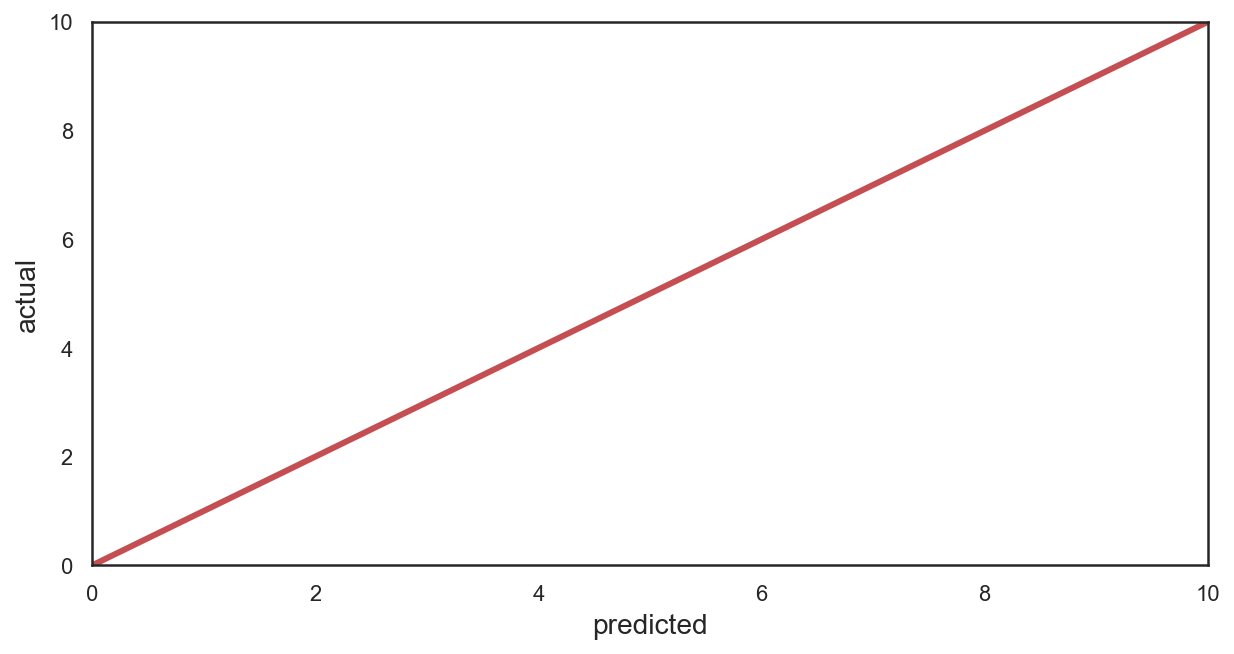

None
Datsun
explained_variance_score: 0.7753825517712549
mean_squared_errors: 0.05720856782660266
r2_score: 0.25412580150029584
None


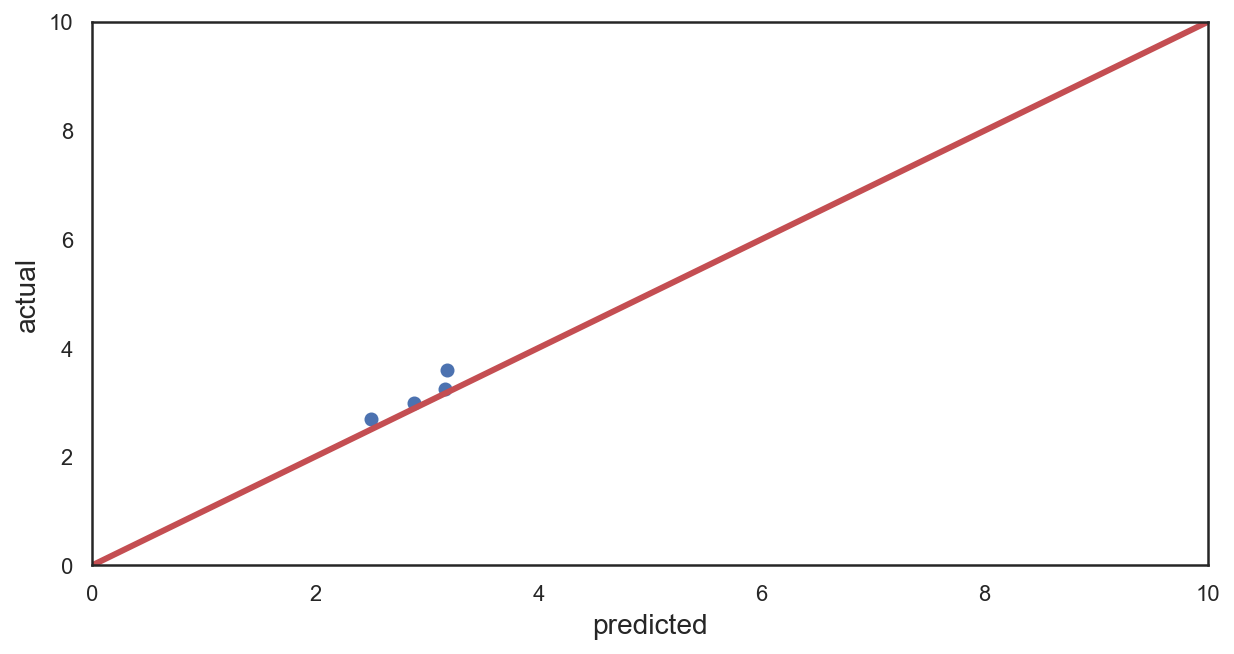

None
Jaguar
explained_variance_score: 0.3578418431800422
mean_squared_errors: 234.22899981806577
r2_score: 0.3267233163917548
None


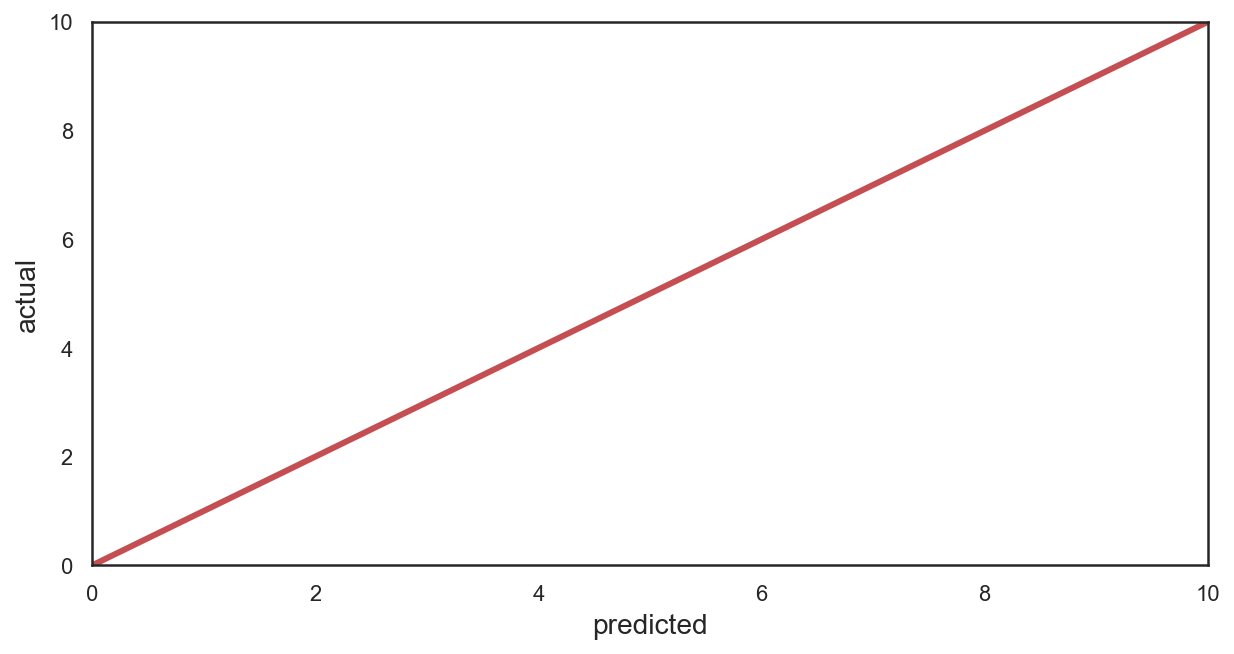

None
Volvo
explained_variance_score: 0.868369586238505
mean_squared_errors: 7.870796762012891
r2_score: 0.8644058733509543
None


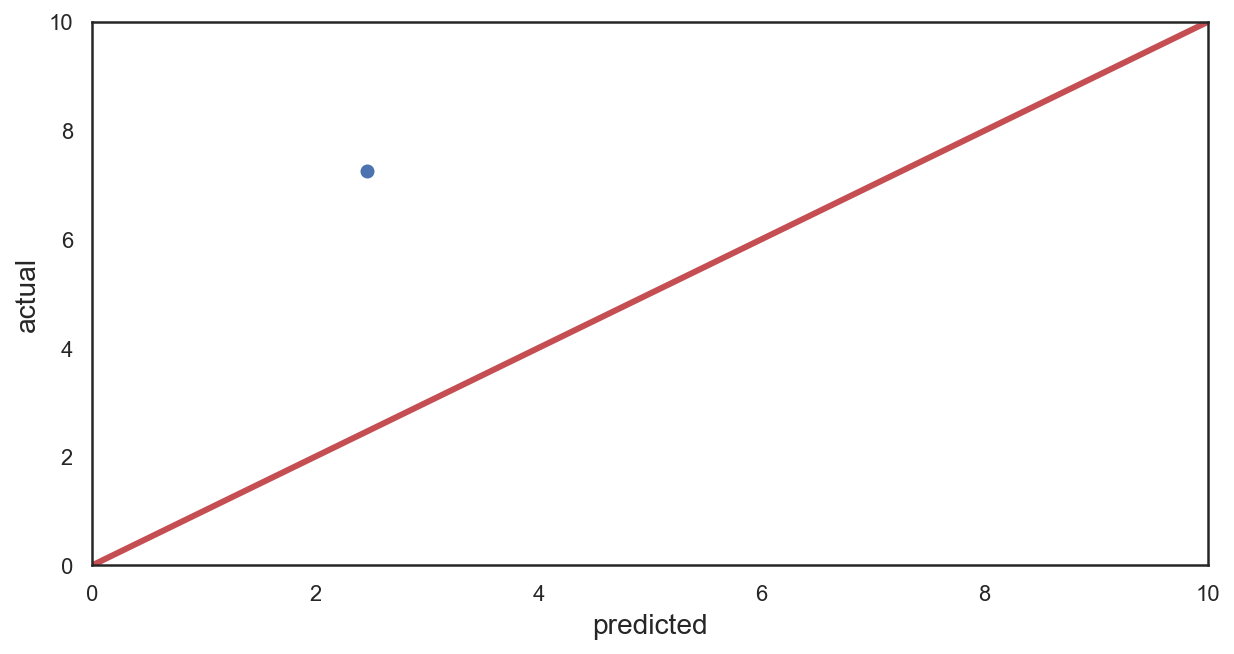

None
Chevrolet
explained_variance_score: 0.7835403429260184
mean_squared_errors: 0.4735651484161932
r2_score: 0.7793923926460196
None


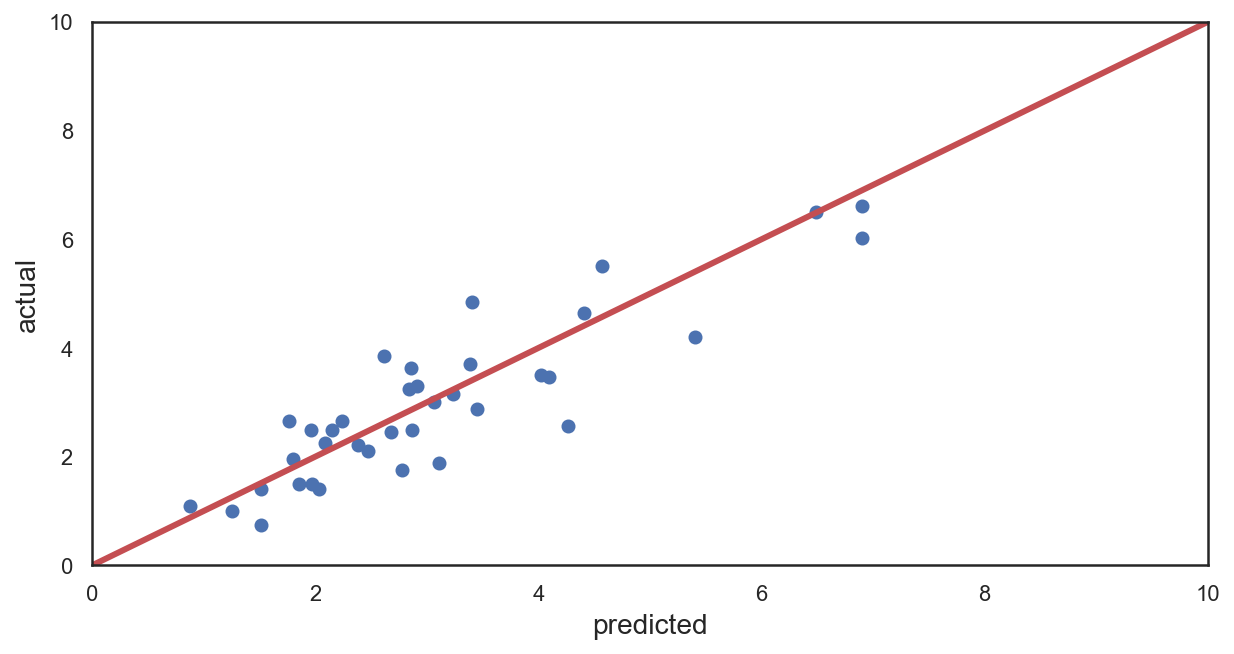

None
Skoda
explained_variance_score: 0.1773218715387117
mean_squared_errors: 11.132736873825628
r2_score: 0.16904744557992413
None


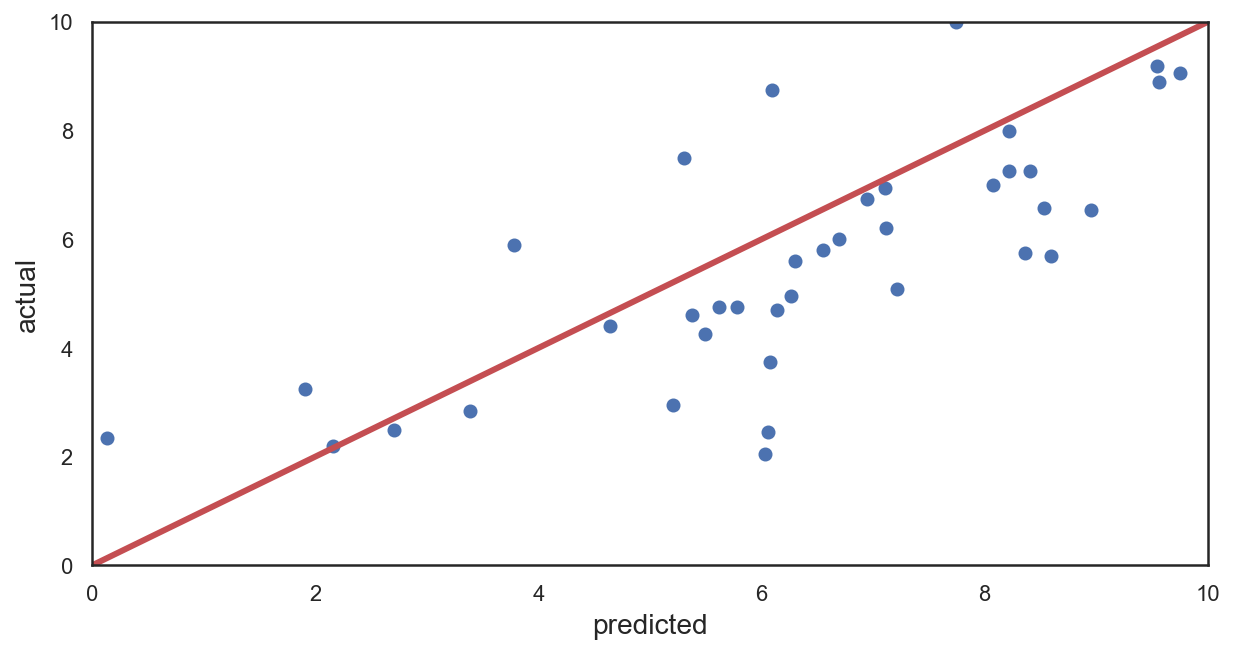

None
Mini
explained_variance_score: 0.7604761919215253
mean_squared_errors: 14.780227177611291
r2_score: 0.752527694096168
None


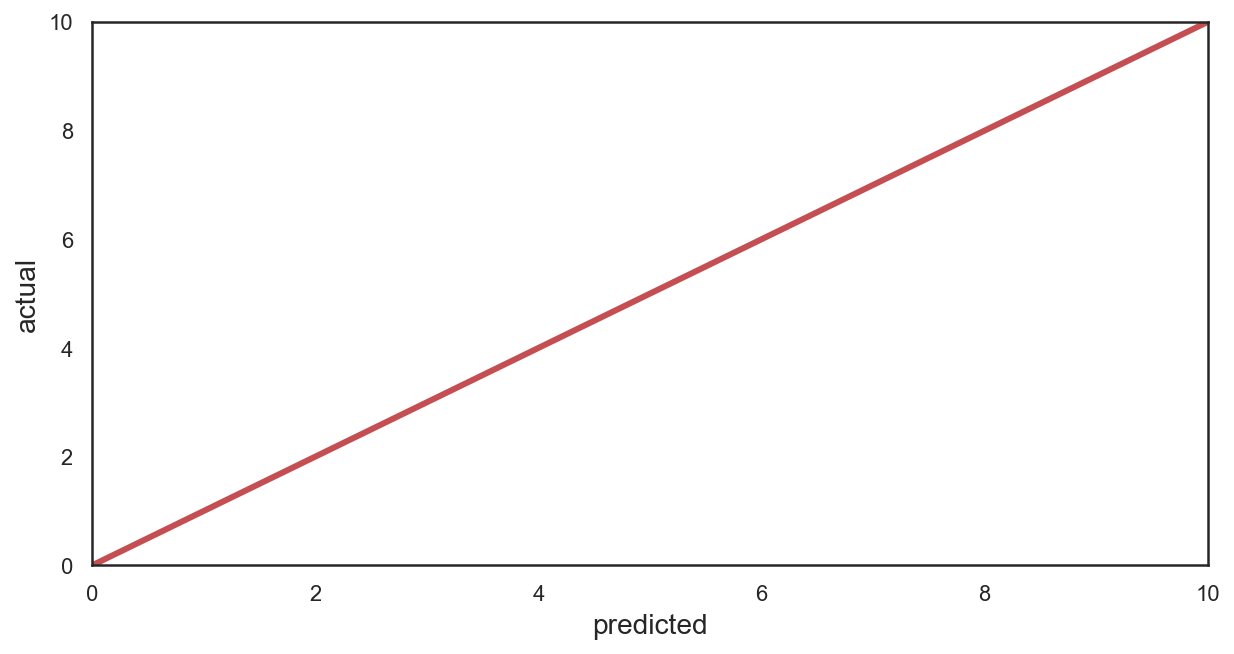

None
Fiat
explained_variance_score: 0.5839127278227938
mean_squared_errors: 4.085144157439952
r2_score: 0.5201855045093424
None


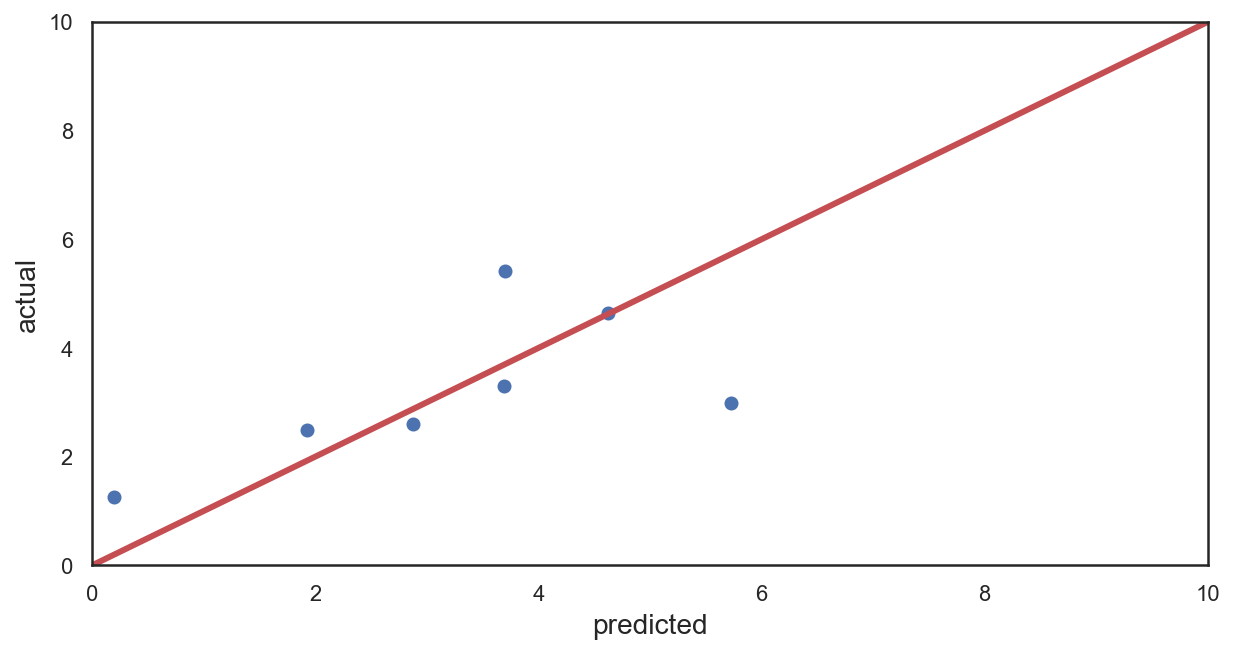

None
Jeep
explained_variance_score: 0.051322732960332296
mean_squared_errors: 42.74949645609288
r2_score: -0.1216116533169398
None


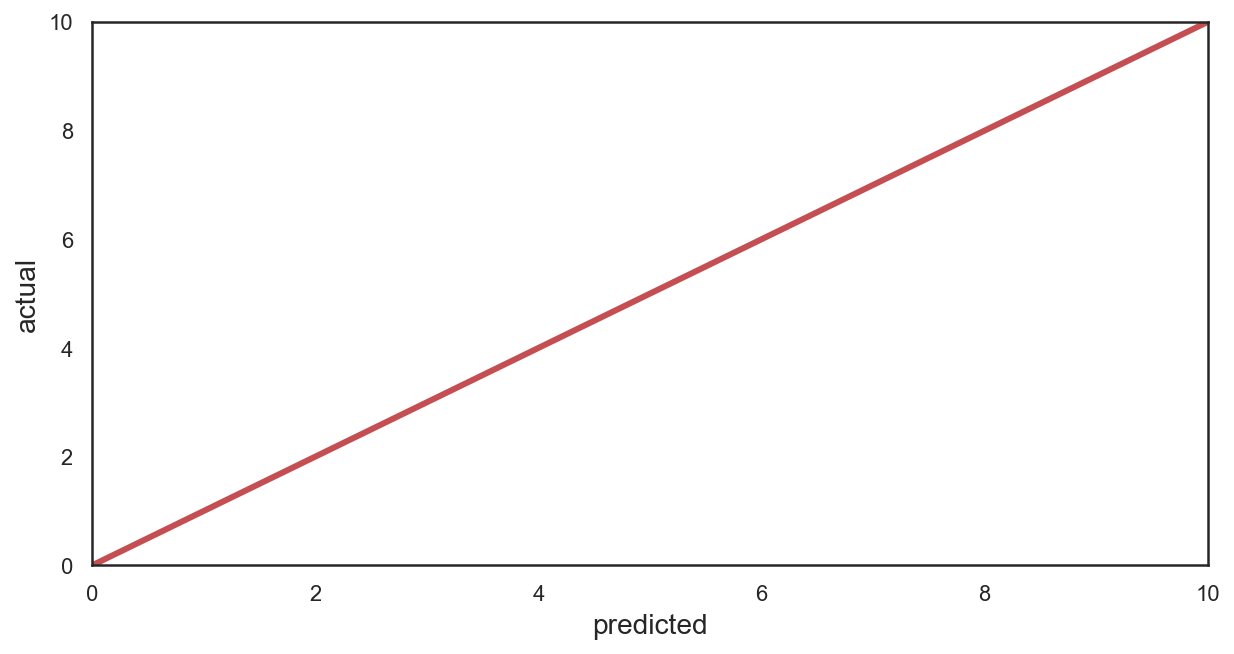

None
Smart
Ambassador
Isuzu
explained_variance_score: 1.0
mean_squared_errors: 193.2054351583212
r2_score: nan
None


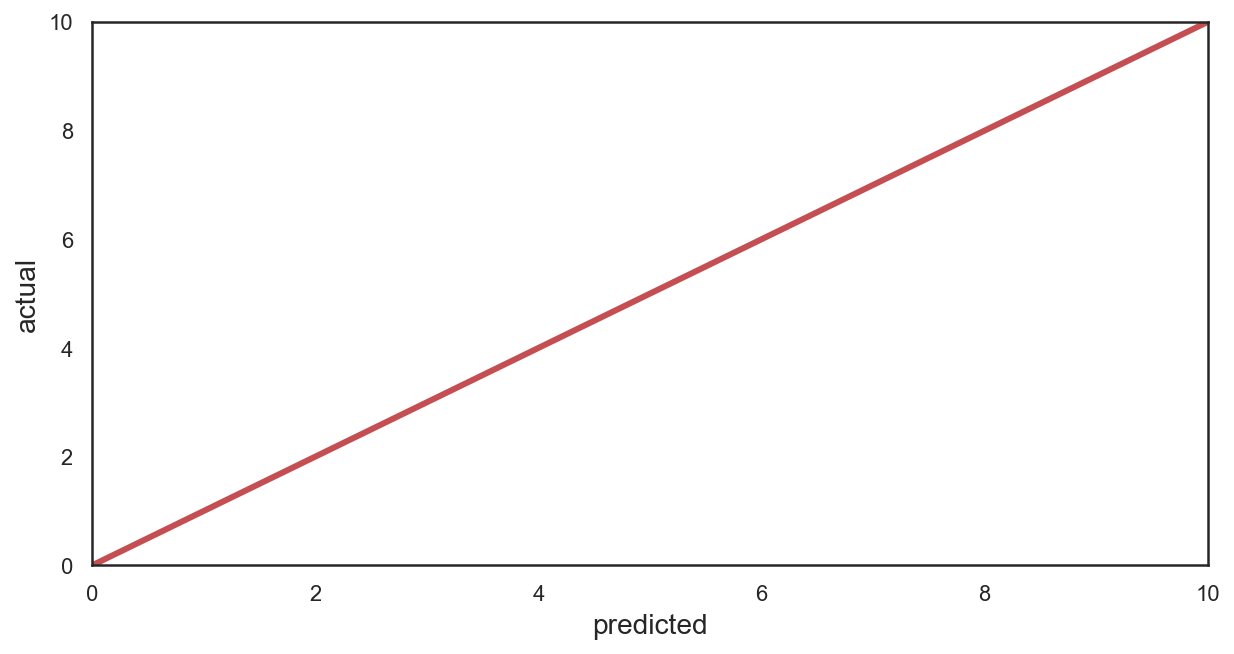

None
Force
explained_variance_score: 1.0
mean_squared_errors: 0.0
r2_score: nan
None


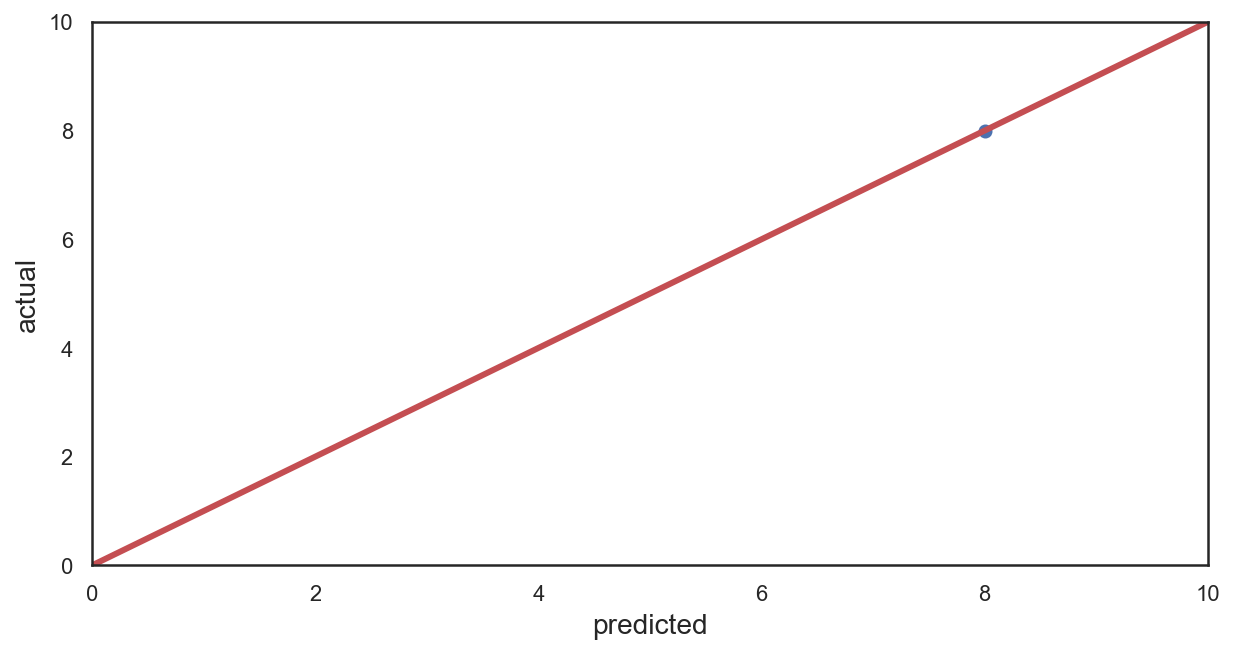

None
Bentley
Lamborghini


In [220]:
for i in car_t['Brand'].unique():
    X = get_Brand_df(i).drop(['Price', 'Car_name', 'Brand'], axis=1)
    y = get_Brand_df(i)['Price']
    
    try:
        print('\033[91m' + '\033[1m' + i + '\033[0m')
        print(get_results(X,y))
        print(get_graph(X,y))
    except:
        pass


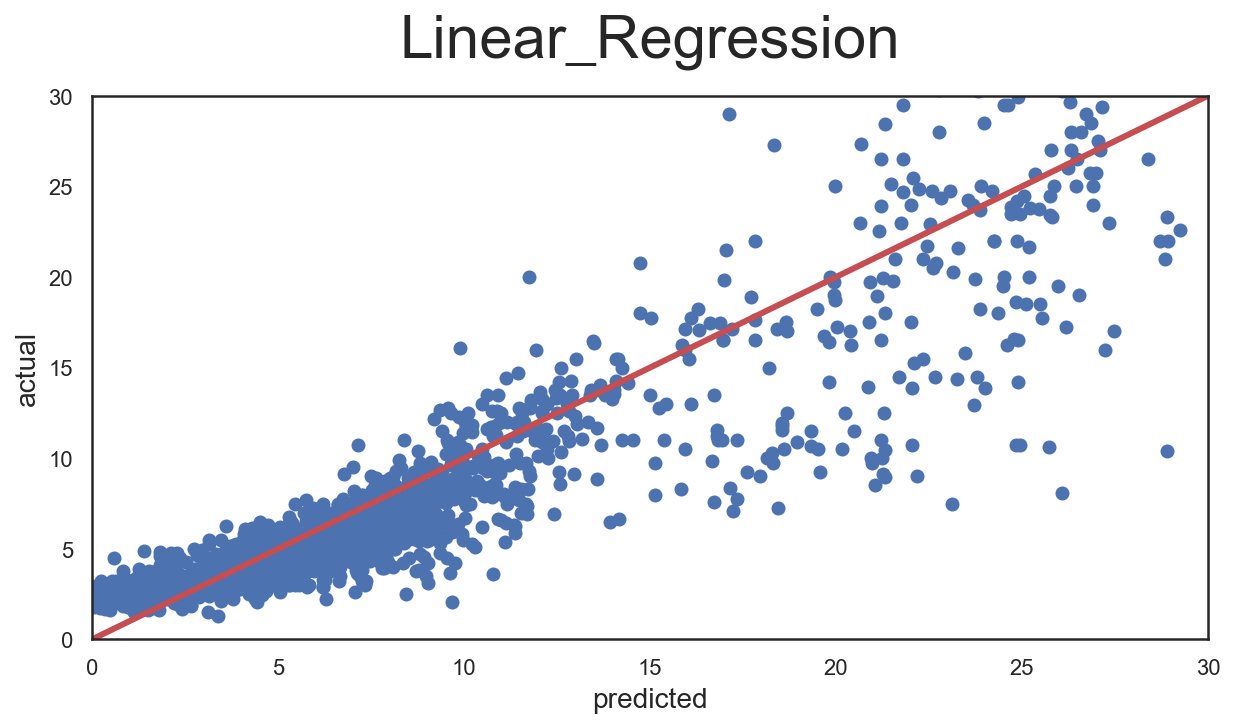

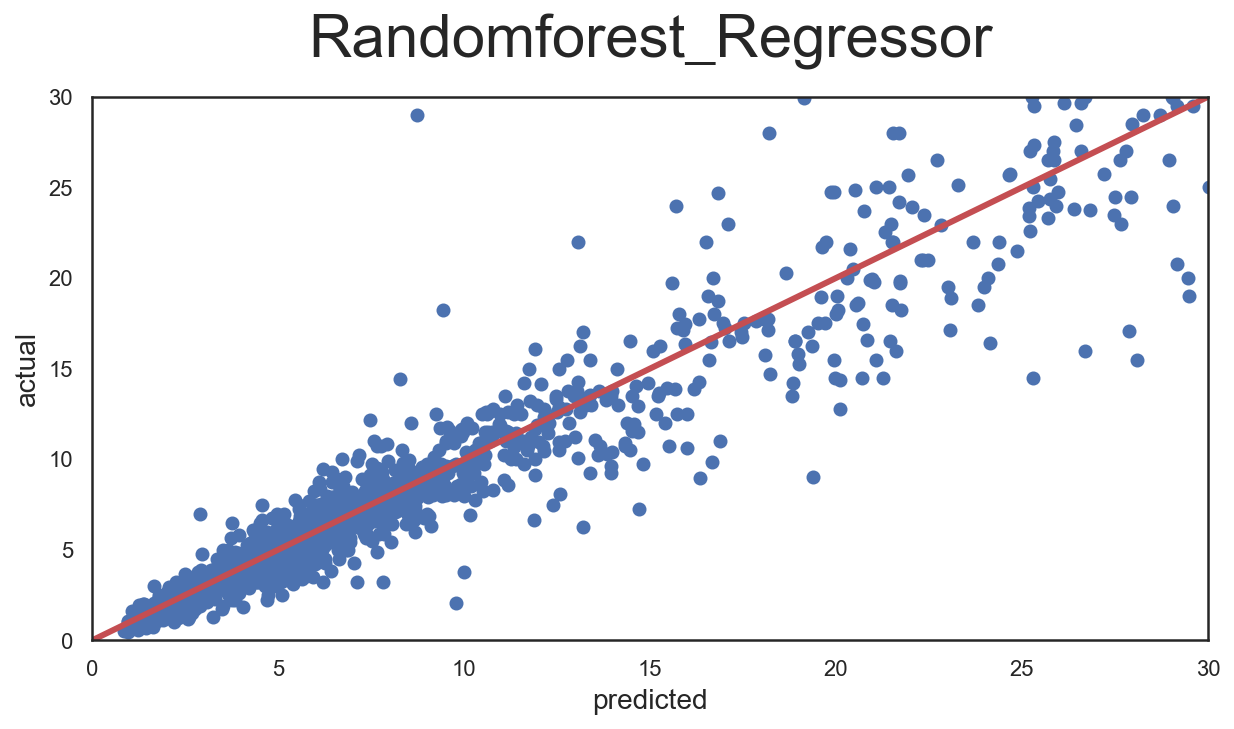

In [221]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(10,5))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 30, 0, 30])  
line = plt.plot([0,30], [0,30])
plt.setp(line, color='r', linewidth=3.0)
plt.title('Linear_Regression', fontsize=30, y=1.05)

plt.show()

X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

predicted = rf_reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(10,5))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 30, 0, 30])  
line = plt.plot([0,30], [0,30])
plt.setp(line, color='r', linewidth=3.0)
plt.title('Randomforest_Regressor', fontsize=30, y=1.05)

plt.show()

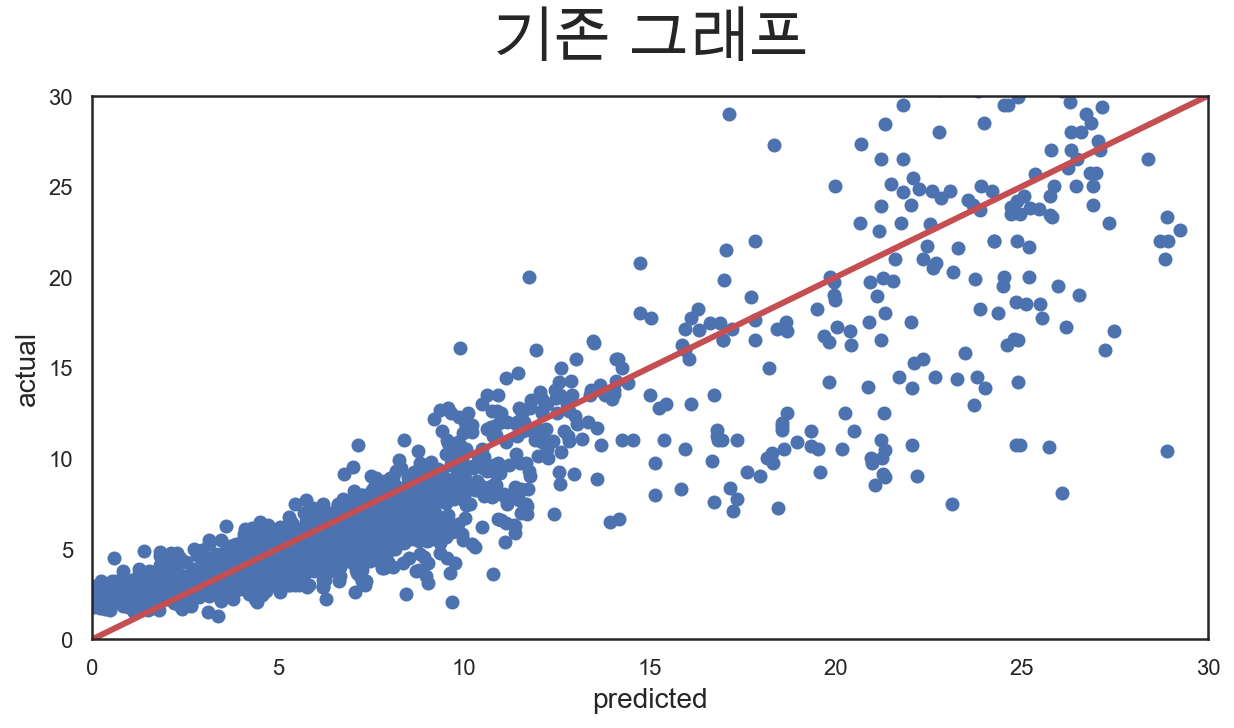

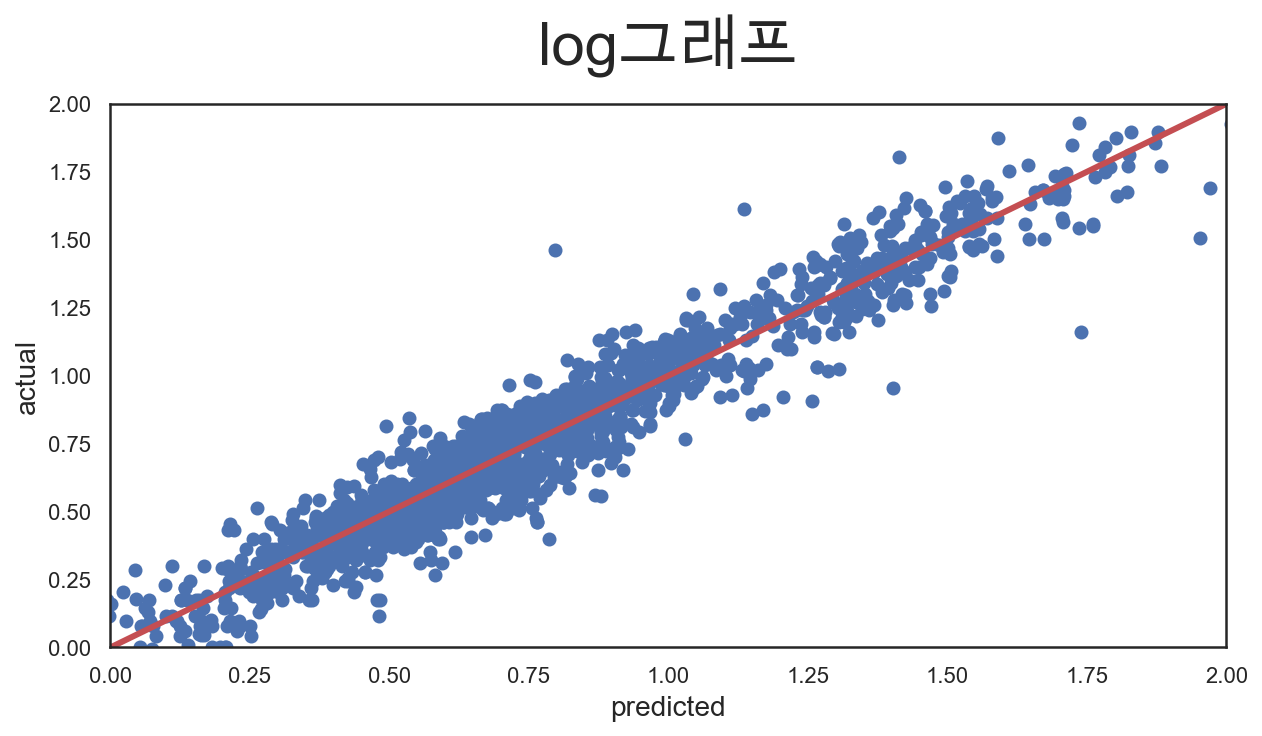

In [222]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(10,5))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 30, 0, 30])  
line = plt.plot([0,30], [0,30])
plt.setp(line, color='r', linewidth=3.0)
plt.title('기존 그래프', fontsize=30, y=1.05)

plt.show()

X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
reg = LinearRegression()
reg.fit(X_train, y_train)

predicted = reg.predict(X_test)

actual = y_test

act_df = pd.DataFrame(actual)
pred_df = pd.DataFrame(predicted)

act_df.reset_index(inplace=True)

act_pred_df = pd.concat([act_df, pred_df], axis=1)

act_pred_df.columns = ['index','actual', 'predicted']

plt.figure(figsize=(10,5))
plt.plot(act_pred_df['predicted'],act_pred_df['actual'], 'o')

plt.xlabel('predicted', fontsize=14)

plt.ylabel('actual', fontsize=14)
plt.axis([0, 2, 0, 2])  
line = plt.plot([0,2], [0,2])
plt.setp(line, color='r', linewidth=3.0)
plt.title('log그래프', fontsize=30, y=1.05)

plt.show()

### 10. 분석 

In [223]:
import statsmodels.api as sm

X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = car_td['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

lin_reg = LinearRegression()
lin_reg = sm.OLS(y_train, X_train).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     298.2
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        16:03:11   Log-Likelihood:                -13071.
No. Observations:                4211   AIC:                         2.624e+04
Df Residuals:                    4164   BIC:                         2.653e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Year                       1.0230      0.032     32.381      0.000       0.961       1.085
Kilometers_Driven       2.607e-06   8.08e-07      3.228      0.001    1.02e-06    4.19e-06
Mile                      -0.1503      0.034     -4.374      0.000      -0.218      -0.083
Pow                        0.0945      0.003     29.835      0.000       0.088       0.101
Location_Ahmedabad      -213.9756      6.580    -32.518      0.000    -226.876    -201.075
Location_Bangalore      -211.3277      6.571    -32.163      0.000    -224.209    -198.446
Location_Chennai        -212.5741      6.537    -32.519      0.000    -225.390    -199.758
Location_Coimbatore     -212.0483      6.634    -31.962      0.000    -225.055    -199.041
Location_Delhi          -214.3673      6.576    -32.599      0.000    -227.260    -201.475
Location_Hyderabad      -212.0349      6.557    -32.335      0.000    -224.891    -199.179
Location_Jaipur         -212.9402      6.553    -32.495      0.000    -225.788    -200.093
Location_Kochi          -213.6776      6.640    -32.181      0.000    -226.695    -200.660
Location_Kolkata        -214.5876      6.570    -32.661      0.000    -227.469    -201.707
Location_Mumbai         -214.2116      6.580    -32.555      0.000    -227.112    -201.311
Location_Pune           -213.5719      6.559    -32.562      0.000    -226.431    -200.713
Fuel_Type_CNG           -586.3388     18.069    -32.450      0.000    -621.764    -550.914
Fuel_Type_Diesel        -586.2189     18.091    -32.403      0.000    -621.688    -550.750
Fuel_Type_LPG           -585.3717     18.139    -32.271      0.000    -620.935    -549.809
Fuel_Type_Petrol        -587.3877     18.097    -32.458      0.000    -622.867    -551.908
Transmission_Automatic -1172.6109     36.167    -32.422      0.000   -1243.517   -1101.705
Transmission_Manual    -1172.7060     36.124    -32.464      0.000   -1243.527   -1101.885
Brand_Ambassador         -77.8145      5.787    -13.447      0.000     -89.160     -66.469
Brand_Audi               -78.6329      2.544    -30.906      0.000     -83.621     -73.645
Brand_BMW                -80.2507      2.508    -32.001      0.000     -85.167     -75.334
Brand_Bentley            -72.0630      5.803    -12.417      0.000     -83.441     -60.685
Brand_Chevrolet          -88.1009      2.582    -34.128      0.000     -93.162     -83.040
Brand_Datsun             -89.0972      3.237    -27.522      0.000     -95.444     -82.750
Brand_Fiat               -87.5560      2.799    -31.282      0.000     -93.043     -82.069
Brand_Force              -89.4596      5.853    -15.283      0.000    -100.935     -77.984
Brand_Ford               -86.8065      2.590    -33.519      0.000     -91.884     -81.729
Brand_Honda              -88.2018      2.550    -34.595      0.000     -93.200  

In [224]:
X = car_td.drop(['Car_name', 'Price', 'Seats', 'Eng'], axis=1) # Eng제거
y = np.log10(car_td['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

lin_reg = LinearRegression()
lin_reg = sm.OLS(y_train, X_train).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1105.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        16:03:32   Log-Likelihood:                 3591.2
No. Observations:                4211   AIC:                            -7088.
Df Residuals:                    4164   BIC:                            -6790.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Year                       0.0564      0.001     93.418      0.000       0.055       0.058
Kilometers_Driven      -1.757e-08   1.54e-08     -1.138      0.255   -4.78e-08    1.27e-08
Mile                      -0.0111      0.001    -16.948      0.000      -0.012      -0.010
Pow                        0.0027   6.06e-05     45.314      0.000       0.003       0.003
Location_Ahmedabad       -11.7161      0.126    -93.113      0.000     -11.963     -11.469
Location_Bangalore       -11.6617      0.126    -92.817      0.000     -11.908     -11.415
Location_Chennai         -11.7169      0.125    -93.735      0.000     -11.962     -11.472
Location_Coimbatore      -11.6852      0.127    -92.109      0.000     -11.934     -11.437
Location_Delhi           -11.7549      0.126    -93.483      0.000     -12.001     -11.508
Location_Hyderabad       -11.6759      0.125    -93.115      0.000     -11.922     -11.430
Location_Jaipur          -11.7563      0.125    -93.821      0.000     -12.002     -11.511
Location_Kochi           -11.7430      0.127    -92.488      0.000     -11.992     -11.494
Location_Kolkata         -11.8165      0.126    -94.054      0.000     -12.063     -11.570
Location_Mumbai          -11.7405      0.126    -93.310      0.000     -11.987     -11.494
Location_Pune            -11.7425      0.125    -93.625      0.000     -11.988     -11.497
Fuel_Type_CNG            -32.2661      0.346    -93.385      0.000     -32.944     -31.589
Fuel_Type_Diesel         -32.1480      0.346    -92.928      0.000     -32.826     -31.470
Fuel_Type_LPG            -32.3050      0.347    -93.135      0.000     -32.985     -31.625
Fuel_Type_Petrol         -32.2905      0.346    -93.313      0.000     -32.969     -31.612
Transmission_Automatic   -64.4817      0.692    -93.239      0.000     -65.838     -63.126
Transmission_Manual      -64.5278      0.691    -93.416      0.000     -65.882     -63.174
Brand_Ambassador          -4.4664      0.111    -40.363      0.000      -4.683      -4.249
Brand_Audi                -4.2775      0.049    -87.921      0.000      -4.373      -4.182
Brand_BMW                 -4.2998      0.048    -89.666      0.000      -4.394      -4.206
Brand_Bentley             -4.4047      0.111    -39.692      0.000      -4.622      -4.187
Brand_Chevrolet           -4.6605      0.049    -94.412      0.000      -4.757      -4.564
Brand_Datsun              -4.6764      0.062    -75.543      0.000      -4.798      -4.555
Brand_Fiat                -4.6315      0.054    -86.535      0.000      -4.736      -4.527
Brand_Force               -4.4530      0.112    -39.784      0.000      -4.672      -4.234
Brand_Ford                -4.5436      0.050    -91.748      0.000      -4.641      -4.447
Brand_Honda               -4.4889      0.049    -92.076      0.000      -4.584  

## 가격예측 

In [225]:
def get_car_price(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    pred = reg.predict(car)
    return(pred)

In [226]:
def get_car_price_rf(car):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train, y_train)

    pred = rf_reg.predict(car)
    return(pred)

### 1. 마루티 

In [227]:
# 9.16
Mcar = np.array([[2018, 71176, 24.29, 1248, 89, 1,
                 0,0,0,
                 0,0,1,
                 0,0,0,
                 0,0,1,
                 0,0,1]])

In [228]:
# Linear_Regression
X = get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = get_Brand_df('Maruti')['Price']

get_car_price(Mcar)

array([7.96242873])

In [229]:
# RandomForest_Regressor
X = get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = get_Brand_df('Maruti')['Price']

get_car_price_rf(Mcar)

array([9.010375])

In [230]:
# 로그를 씌운 Linear_Regression
X = get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Maruti')['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

reg = LinearRegression()
reg.fit(X_train, y_train)

pred = reg.predict(Mcar)
print(pred)

[1.01466224]


In [231]:
math.pow(10,1.01466224)

10.34337427704186

In [232]:
get_Brand_df('Maruti').drop(['Price', 'Car_name', 'Brand'], axis=1).columns

Index(['Year', 'Kilometers_Driven', 'Mile', 'Eng', 'Pow', 'Owner',
       'Location_Ahmedabad', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

### 2. 현대 

In [233]:
# 5.55
Hcar = np.array([[2017, 36643, 24, 1186, 73.97, 1,
                 0,0,0,
                 0,0,0,
                 0,0,0,
                 1,0,1,
                 0,0,1]])

In [234]:
# Linear_Regression
X = get_Brand_df('Hyundai').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = get_Brand_df('Hyundai')['Price']

get_car_price(Hcar)

array([5.86493974])

In [235]:
# RandomForest_Regressor
X = get_Brand_df('Hyundai').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = get_Brand_df('Hyundai')['Price']

get_car_price_rf(Hcar)

array([4.5942])

In [236]:
# log모델
X = get_Brand_df('Hyundai').drop(['Price', 'Car_name', 'Brand'], axis=1)
y = np.log10(get_Brand_df('Hyundai')['Price'])

get_car_price(Hcar)

array([0.77933507])

In [237]:
math.pow(10,0.77933507)

6.01637738337543